### Apollo Hospitals: Forecasting demand for food at Apollo Hospitals

The case study describes the problem of wastage of food in the Apollo Hospital, Bangalore. The problem revolves around the consumption of daily food items by patients where patients order their breakfast, lunch and dinner based on the menu provided. The order is taken in the morning on a daily basis. The daily demand varies so the F&B staff prepare the food based on historical orders which results in huge wastage. 

The objective is to develop a forecasting model to predict the demand for each food item 2 days ahead as well as 1 day ahead so that procurement can be done accordingly.

Assumptions:
1. Pre-consumption wastage in the process of food preparation is ignored.
2. Post-consumption wastage due to leftovers, quality of food served, size of serving and other reasons is ignored.
3. Losses due to excess procurement is ignored due to unavailability of data

##### Importing the packages

In [1]:
library(forecast)
library(fpp)
library(TTR)
library(ggplot2)

Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: tseries


##### Loading the dataset

In [2]:
food <- read.csv("Apollo Hospitals Food.csv")

##### Summaries

Let us take a look at the dataset

In [3]:
head(food)

Date,BKFST_OCCUP,Idly,Dosa,Chutney,Sambar,Continental.B.F,North.Indian.B.F,Omellette,Day.of.Week,Propn.taking.Idly
01-10-12,250,40,30,95,95,25,6,15,M,0.1600000
02-10-12,236,65,33,120,120,25,2,7,T,0.2754237
03-10-12,244,59,21,119,120,25,2,8,W,0.2418033
04-10-12,239,65,42,140,150,35,5,10,Th,0.2719665
05-10-12,221,70,26,126,126,41,3,13,F,0.3167421
06-10-12,211,63,44,135,135,30,3,5,Sa,0.2985782


In [4]:
summary(food)

       Date      BKFST_OCCUP         Idly            Dosa          Chutney     
 01-01-13:  1   Min.   :151.0   Min.   :40.00   Min.   : 0.00   Min.   : 95.0  
 01-10-12:  1   1st Qu.:200.0   1st Qu.:54.00   1st Qu.:18.00   1st Qu.:125.0  
 01-11-12:  1   Median :215.0   Median :61.00   Median :22.00   Median :130.0  
 01-12-12:  1   Mean   :215.2   Mean   :59.27   Mean   :25.48   Mean   :131.3  
 02-01-13:  1   3rd Qu.:228.5   3rd Qu.:65.00   3rd Qu.:27.00   3rd Qu.:135.0  
 02-10-12:  1   Max.   :259.0   Max.   :70.00   Max.   :62.00   Max.   :160.0  
 (Other) :109                                                                  
     Sambar      Continental.B.F North.Indian.B.F   Omellette      Day.of.Week
 Min.   : 95.0   Min.   :25.0    Min.   :0.000    Min.   : 5.00   M      :17  
 1st Qu.:125.0   1st Qu.:40.0    1st Qu.:2.500    1st Qu.:10.00   W      :17  
 Median :130.0   Median :40.0    Median :5.000    Median :13.00   F      :16  
 Mean   :131.5   Mean   :41.3    Mean   :4.3

In [5]:
## Column names
names(food)

[1] "Date"              "BKFST_OCCUP"       "Idly"             
 [4] "Dosa"              "Chutney"           "Sambar"           
 [7] "Continental.B.F"   "North.Indian.B.F"  "Omellette"        
[10] "Day.of.Week"       "Propn.taking.Idly"

##### Extracting and converting into time-series objects

In [6]:
boccp <- food$BKFST_OCCUP
idly <- food$Idly
dosa <- food$Dosa
chutney <- food$Chutney
sambar <- food$Sambar
contbf <- food$Continental.B.F
northbf <- food$North.Indian.B.F
omellette <- food$Omellette

In [7]:
boccpts <- ts(boccp, start=c(1), end=c(16), frequency = 7)
idlyts <- ts(idly, start=c(1), end=c(16), frequency = 7)
dosats <- ts(dosa, start=c(1), end=c(16), frequency = 7)
chutneyts<- ts(chutney, start=c(1), end=c(16), frequency = 7)
sambarts <- ts(sambar, start=c(1), end=c(16), frequency = 7)
contbfts <- ts(contbf, start=c(1), end=c(16), frequency = 7)
northbfts <- ts(northbf, start=c(1), end=c(16), frequency = 7)
omellettets <- ts(omellette, start=c(1), end=c(16), frequency = 7)

##### Plotting the data

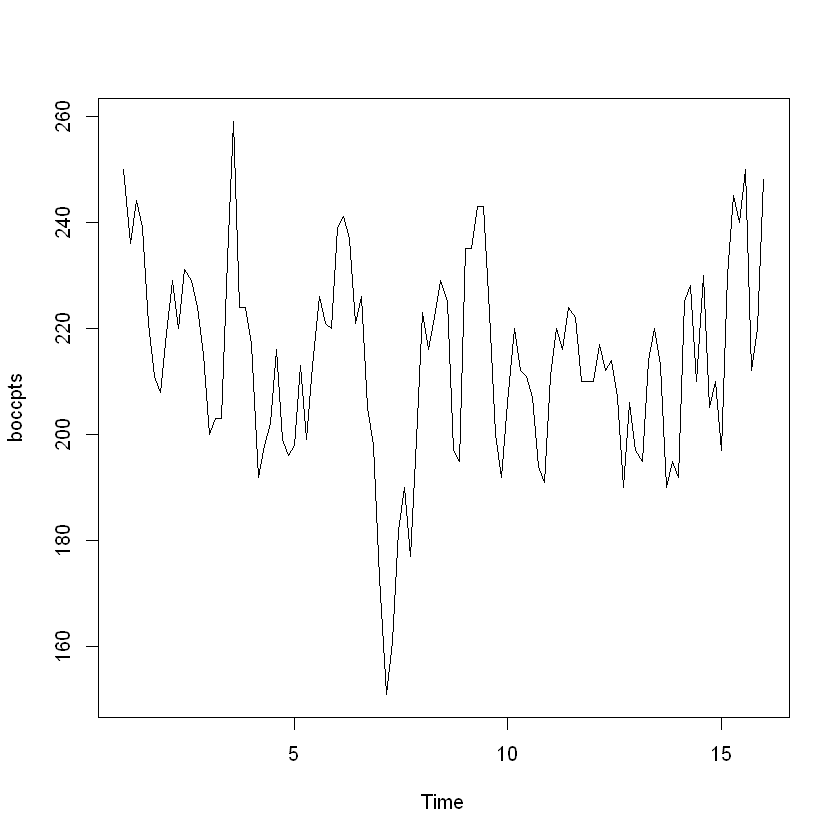

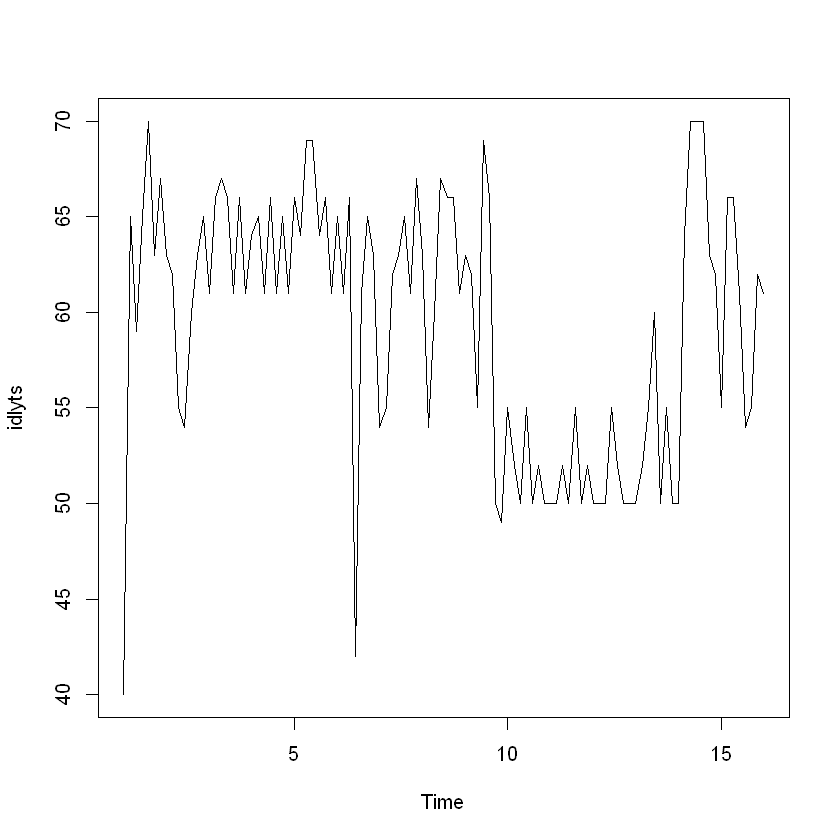

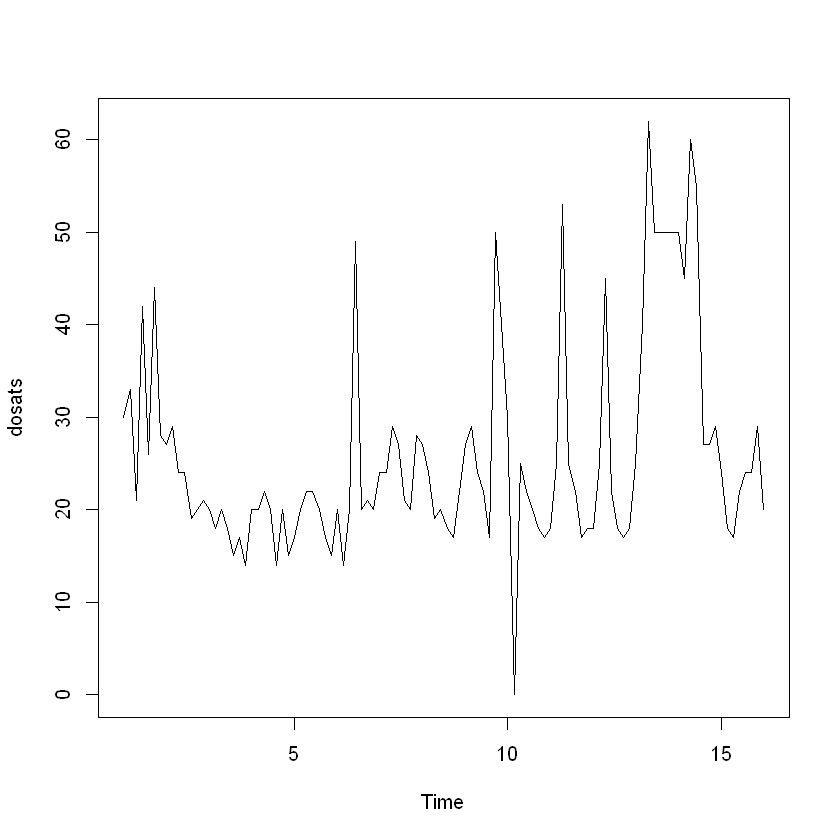

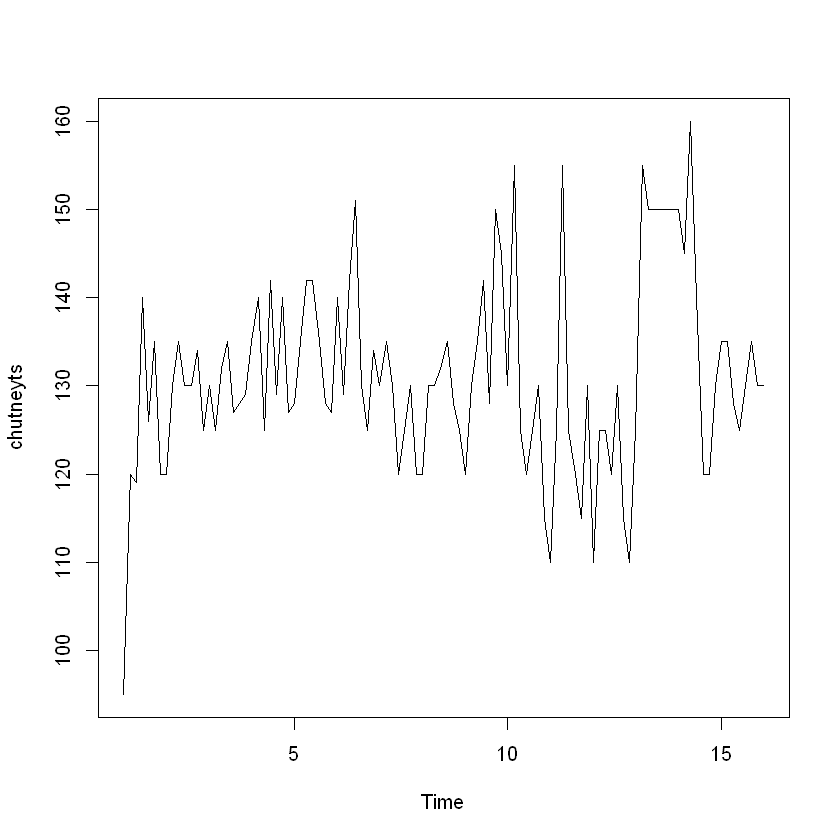

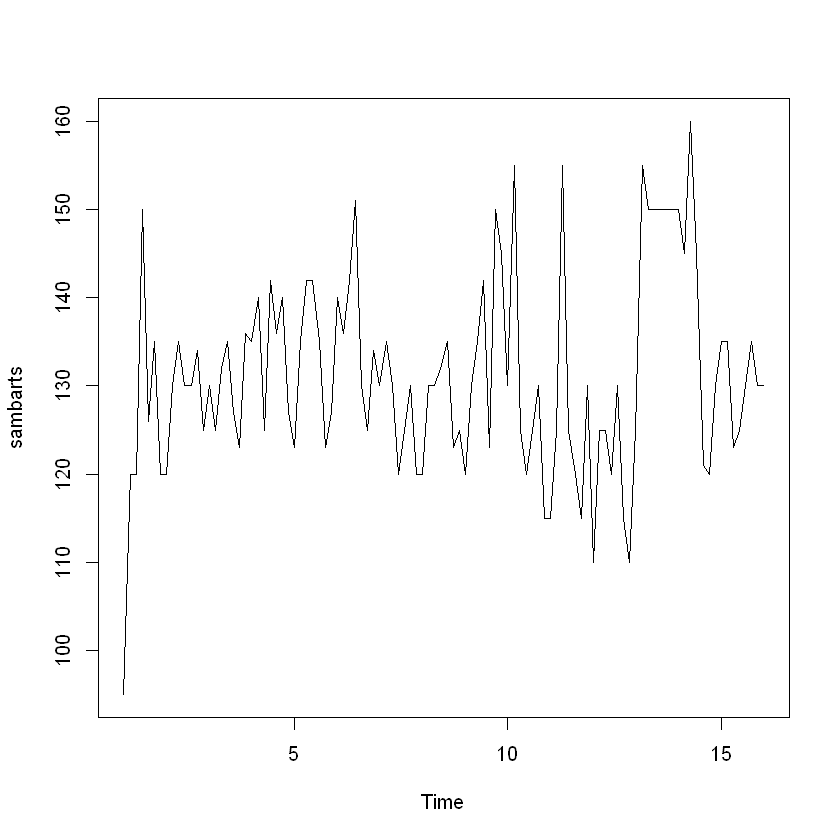

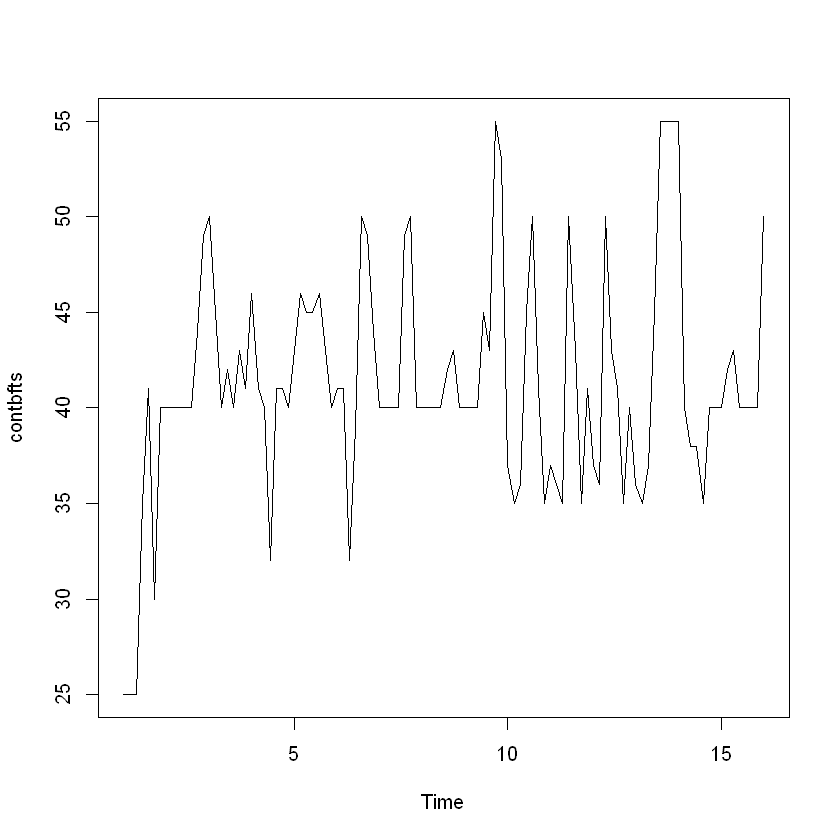

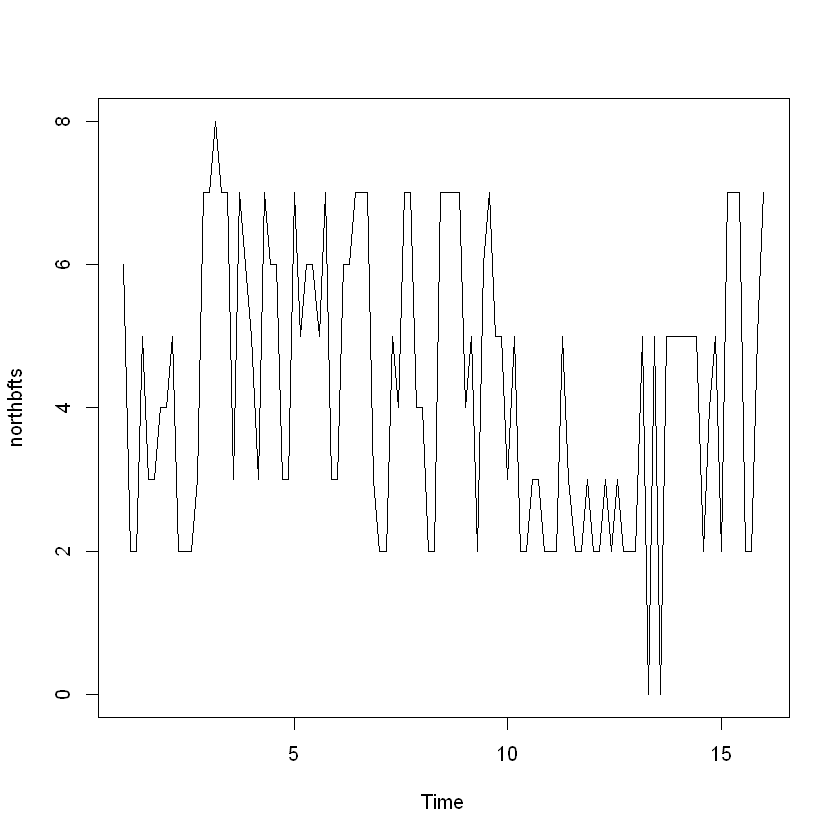

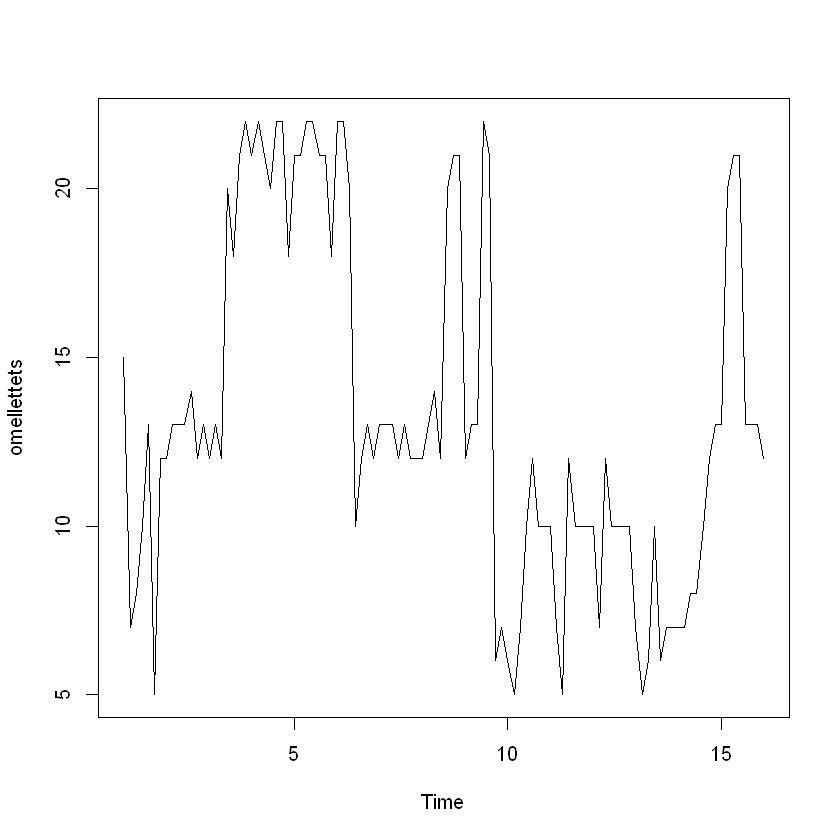

In [8]:
plot(boccpts)
plot(idlyts)
plot(dosats)
plot(chutneyts)
plot(sambarts)
plot(contbfts)
plot(northbfts)
plot(omellettets)

After plotting the timeseries objects, we observe that there is no trend or seasonality present in the data. We observe piece-wise trends and seasonality in few of the plots but considering the entire time range of the data, we do not observe any trend or seasonality.

###### Seasonal plots

Let us create some seasonal plots to verify the seasonality and trend.

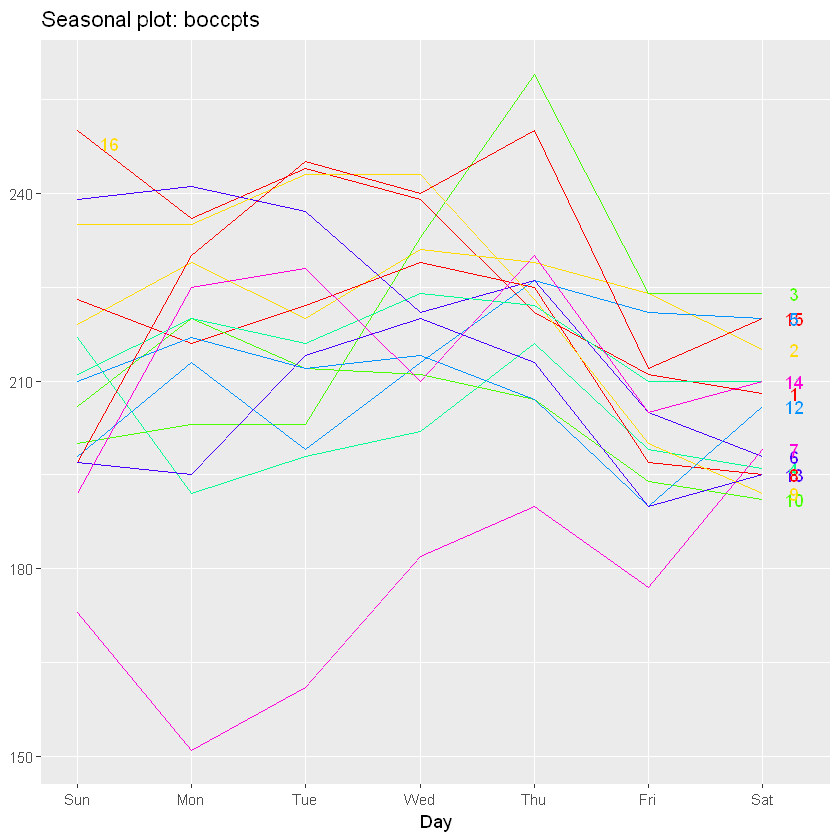

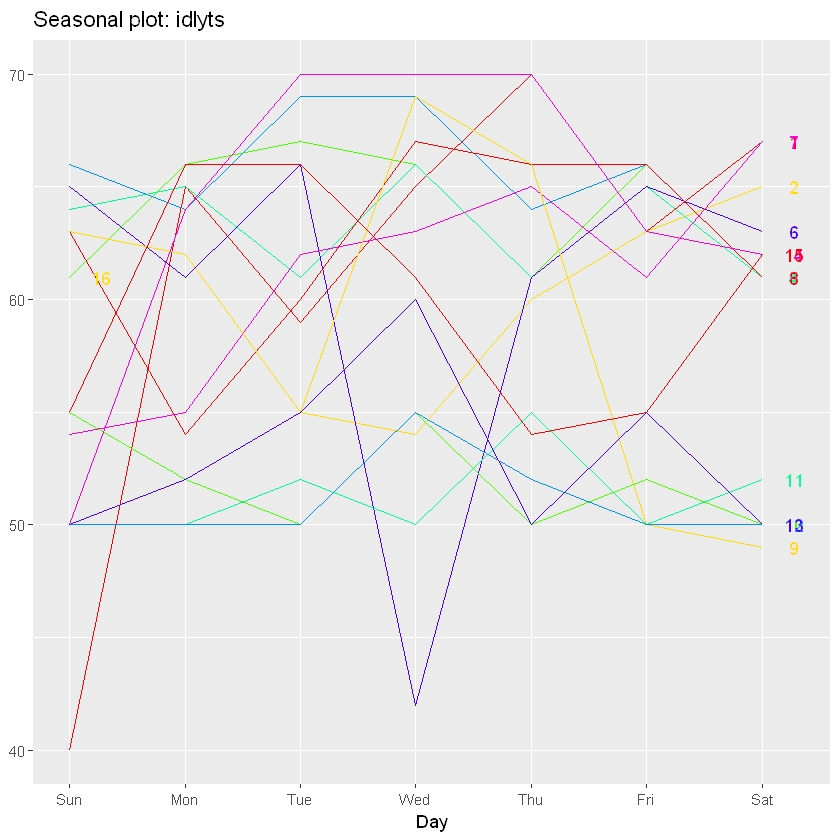

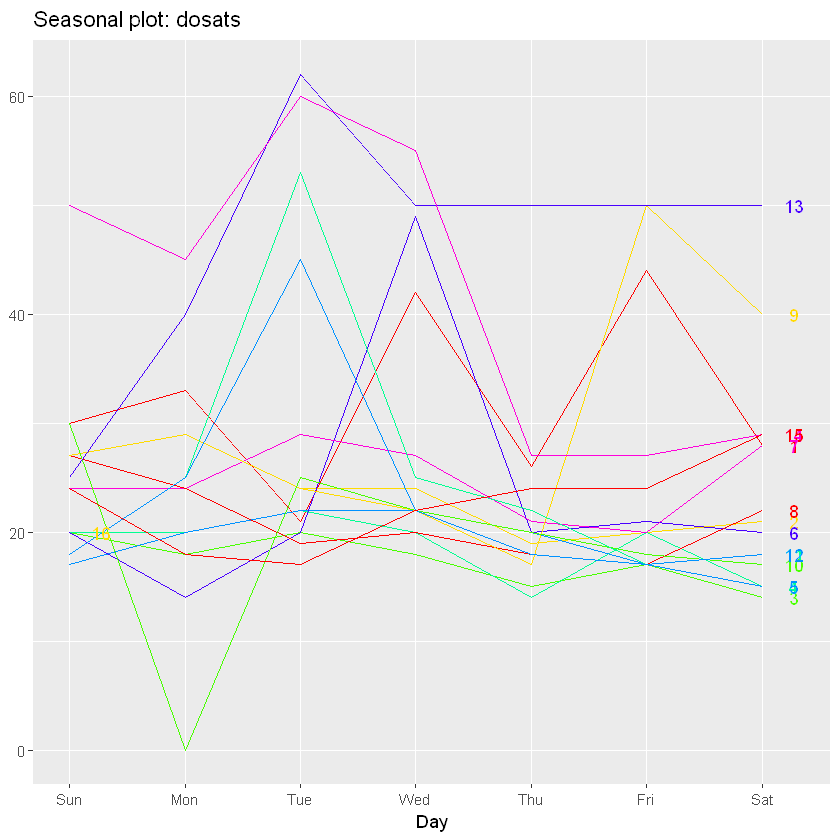

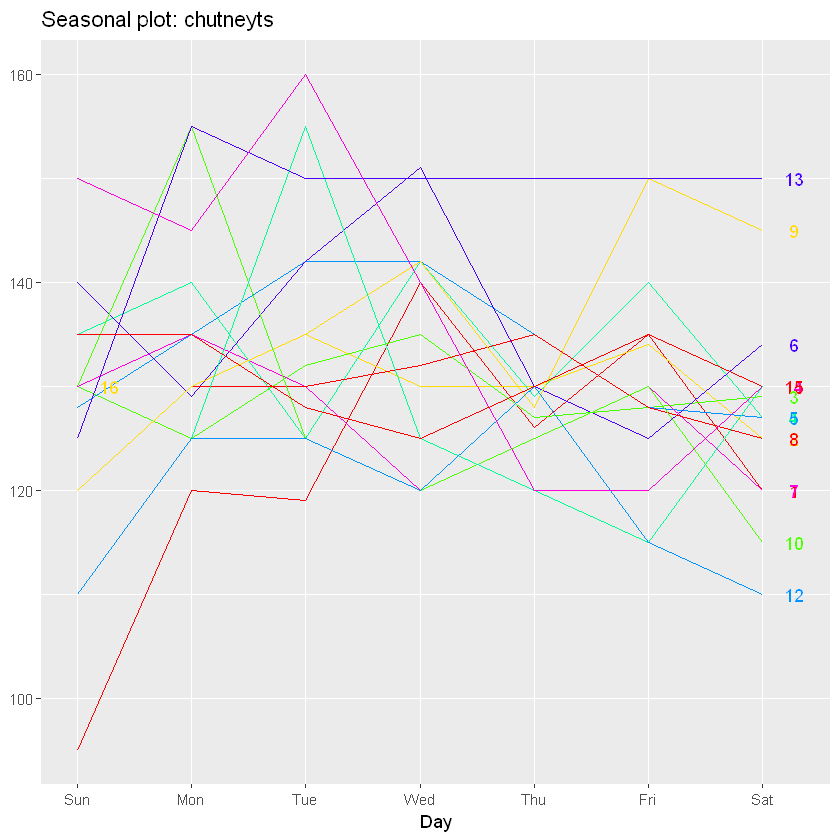

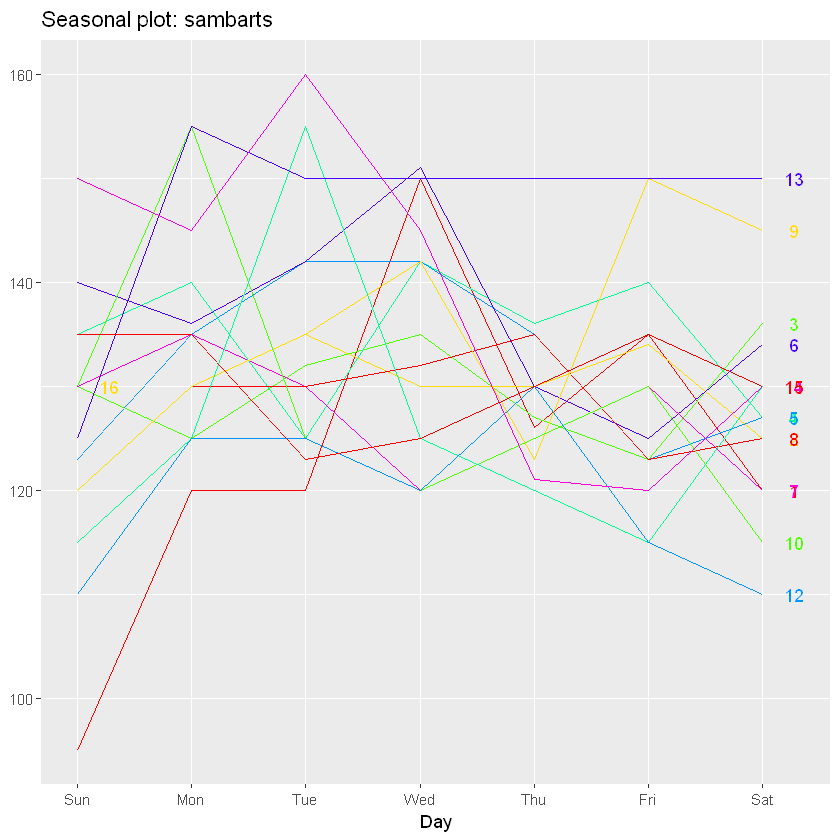

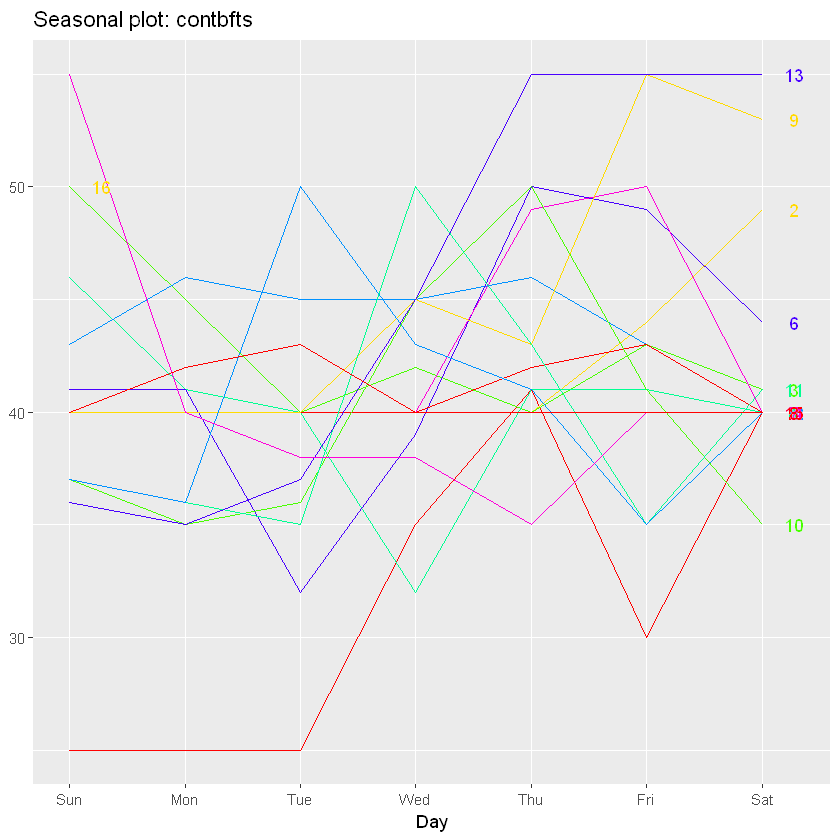

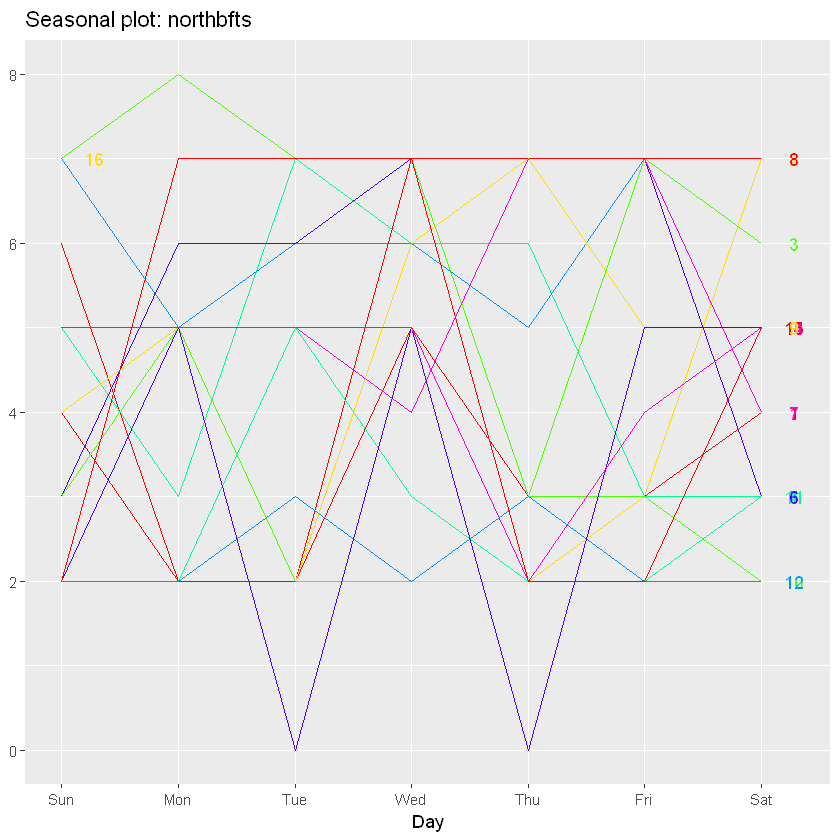

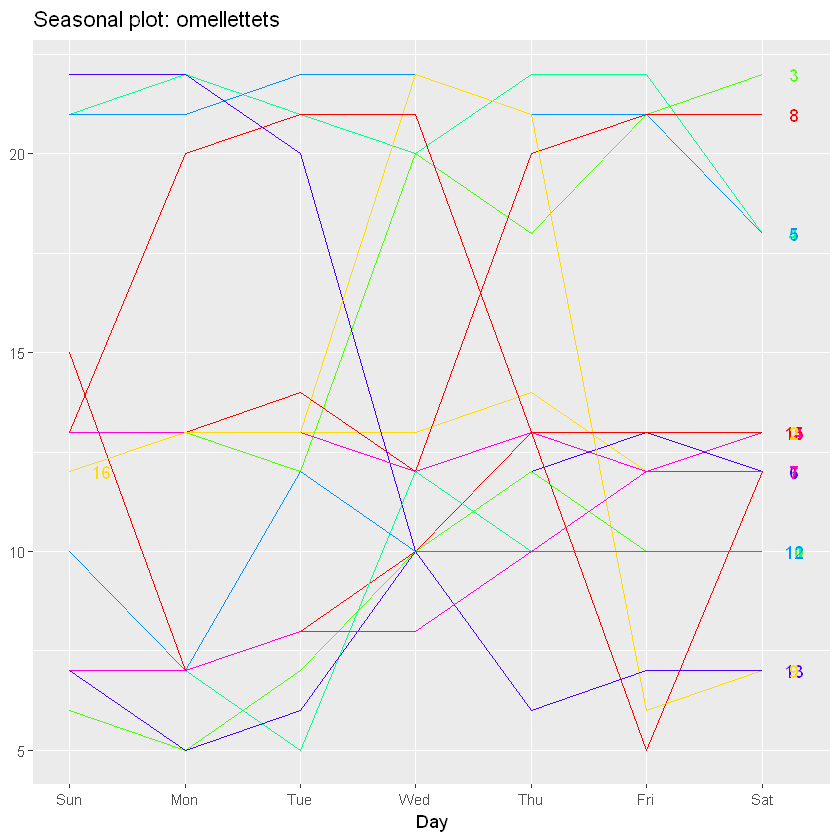

In [9]:
ggseasonplot(boccpts, col = rainbow(7), year.labels = TRUE)
ggseasonplot(idlyts, col = rainbow(7), year.labels = TRUE)
ggseasonplot(dosats, col = rainbow(7), year.labels = TRUE)
ggseasonplot(chutneyts, col = rainbow(7), year.labels = TRUE)
ggseasonplot(sambarts, col = rainbow(7), year.labels = TRUE)
ggseasonplot(contbfts, col = rainbow(7), year.labels = TRUE)
ggseasonplot(northbfts, col = rainbow(7), year.labels = TRUE)
ggseasonplot(omellettets, col = rainbow(7), year.labels = TRUE)

As we can verify from the seasonal plots, there is no observable trend or seasonality in the time-series variables.

##### Forecasting

Before we move to the forecasting part, let us focus on the following few points:

1. Since the time series variables do not have any trend or seasonality we will restrict our forecasts to Simple Exponential Smoothing and ARIMA models.
2. We will also use some simple forecasting techniques included in the forecast package such as forecasting using mean and random walk with drift.
3. In order to obtain comparatively better forecasts, we will use the ARIMA model and the fitting of the ARIMA model is also referred to as Box-Jenkins method. ARIMA stands for auto-regressive integrated moving average which is specified by 3 parameters (p,d,q). The auto-regressive parameter p specifies the number of lags used in the model.The d represents the degree of differencing and the moving average (MA(q)) component represents the error of the model. We will use auto.arima function which automatically chooses the optimal values of p,d,q.
4. In order to implement the ARIMA model, the series has to be stationary. We will use Augmented Dickey-Fuller (ADF) test to determine if the series is stationary. The null hypothesis assumes that the series is non-stationary. 

###### Breakfast occupancy

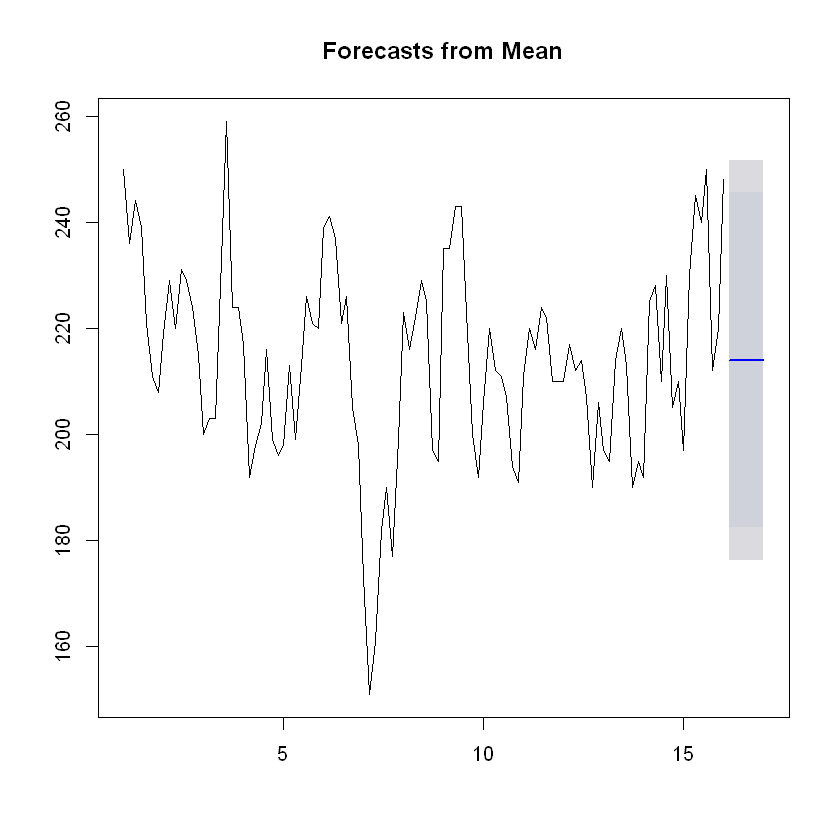

In [10]:
## Forecasts from mean
mf_boccp <- meanf(boccpts, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_boccp)

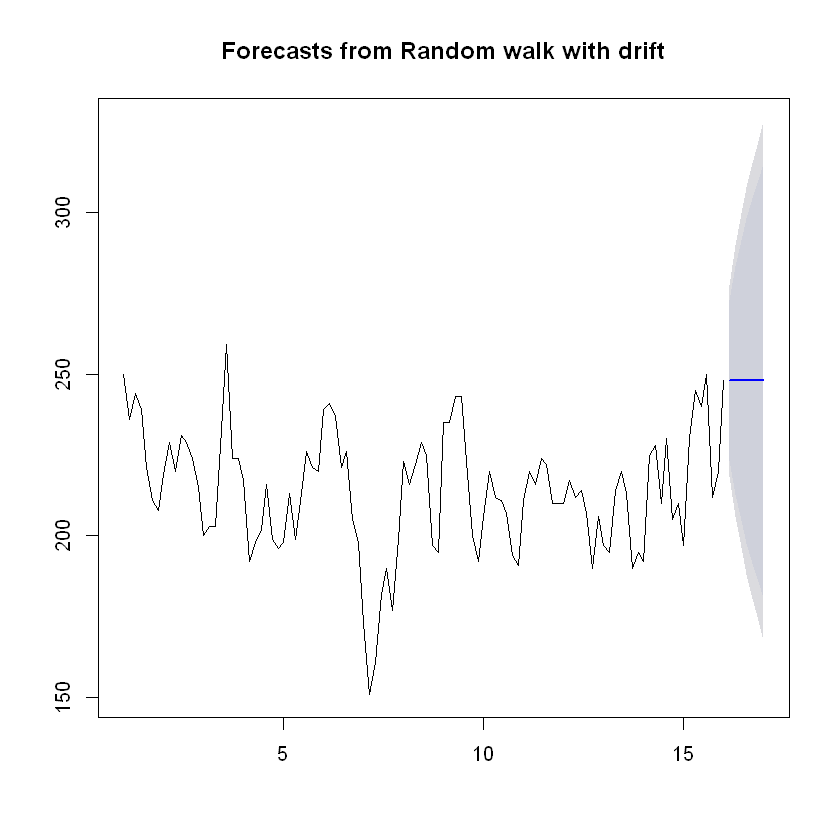

In [11]:
## forecasts from random walk with drift
rdw_boccp <- rwf(boccpts, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_boccp)

In [12]:
## Checking the accuracies
accuracy(mf_boccp)
accuracy(rdw_boccp)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-6.433402e-15,18.81889,14.73621,-0.8215528,7.067509,0.7743547,0.6542437


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,7.038451e-15,14.96344,11.7141,-0.2484836,5.540716,0.6155501,-0.02042986


##### Prediction using Simple Exponential Smoothing 

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       247.0535 227.7917 266.3153 217.5951 276.5119
16.29       247.0535 220.2660 273.8409 206.0856 288.0214
16.43       247.0535 214.4326 279.6743 197.1642 296.9427

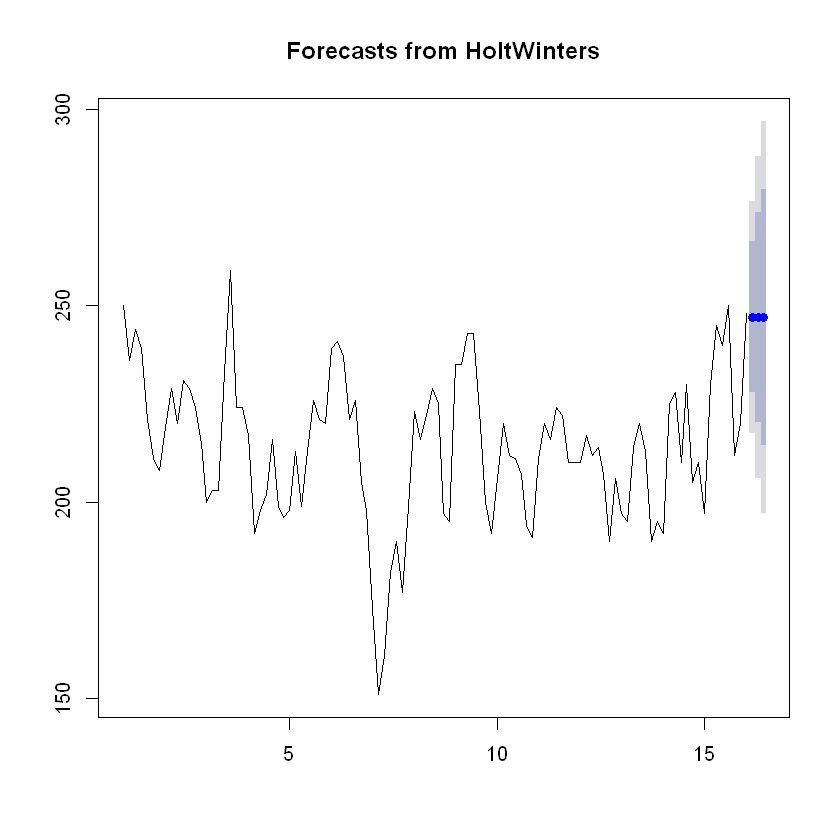

In [13]:
fit_boccp <- HoltWinters(boccpts, beta=FALSE, gamma=FALSE)
forecast(fit_boccp, 3)
plot(forecast(fit_boccp,3))

##### Stationarity test

We check for the stationarity of the data

In [14]:
library(tseries)
adf = adf.test(boccpts)
adf


	Augmented Dickey-Fuller Test

data:  boccpts
Dickey-Fuller = -3.4478, Lag order = 4, p-value = 0.05025
alternative hypothesis: stationary


In [15]:
ndiffs(boccpts)

[1] 0

Since ndiffs = 0, we do not require any differentiation of the dataset to apply arima.

##### Using ARIMA for prediction

In [16]:
auto.arima(boccpts)

Series: boccpts 
ARIMA(2,0,0)(1,0,0)[7] with non-zero mean 

Coefficients:
         ar1      ar2    sar1      mean
      0.8614  -0.1601  0.3036  216.9698
s.e.  0.1016   0.0995  0.1034    5.9728

sigma^2 estimated as 179.2:  log likelihood=-424.12
AIC=858.25   AICc=858.85   BIC=871.56

In [66]:
fr_boccp <- forecast(auto.arima(boccpts),3)
fr_boccp

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       252.0525 234.8984 269.2067 225.8176 278.2875
16.29       246.3525 223.7119 268.9931 211.7267 280.9783
16.43       236.9573 212.2142 261.7004 199.1160 274.7986

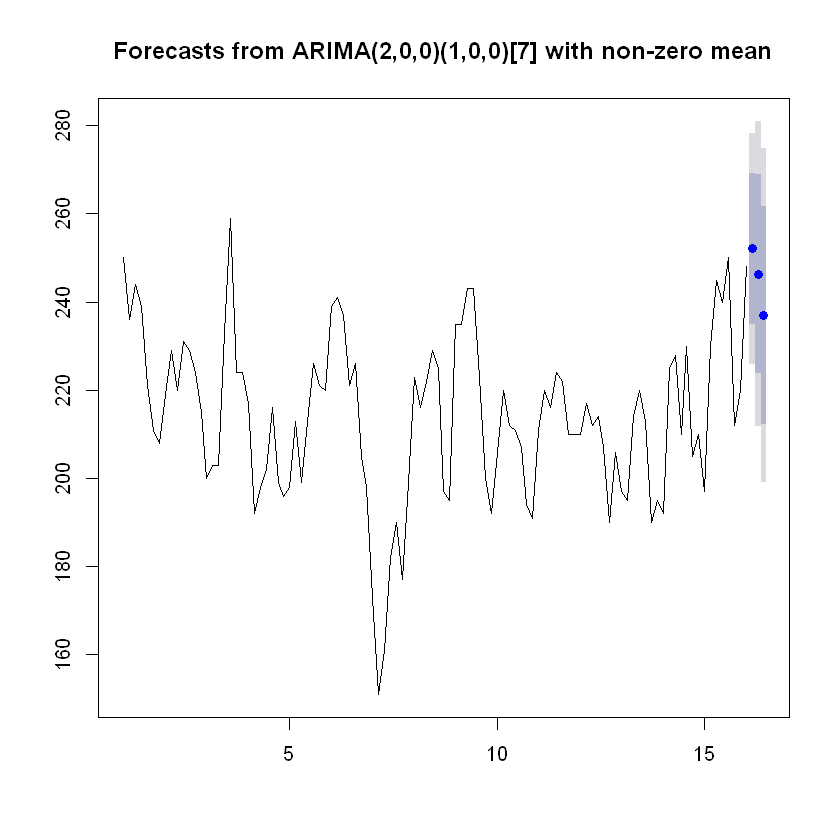

In [67]:
plot(forecast(auto.arima(boccpts),3))

So we have a pretty accurate prediction of the next 3 values for breakfast occupancy.
1. 252
2. 246
3. 237

###### Idly 

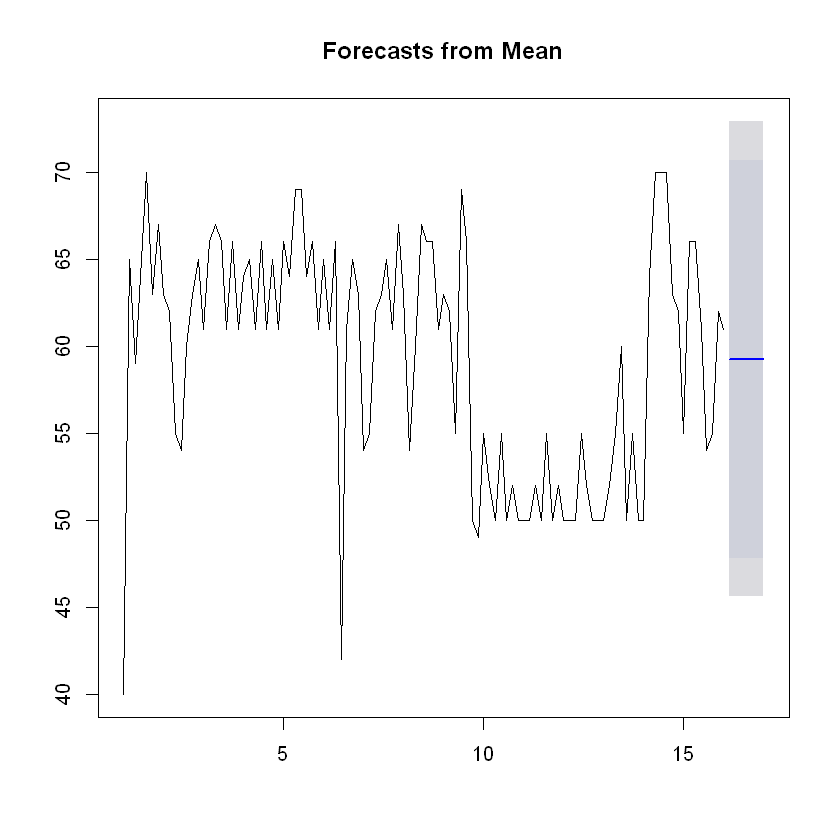

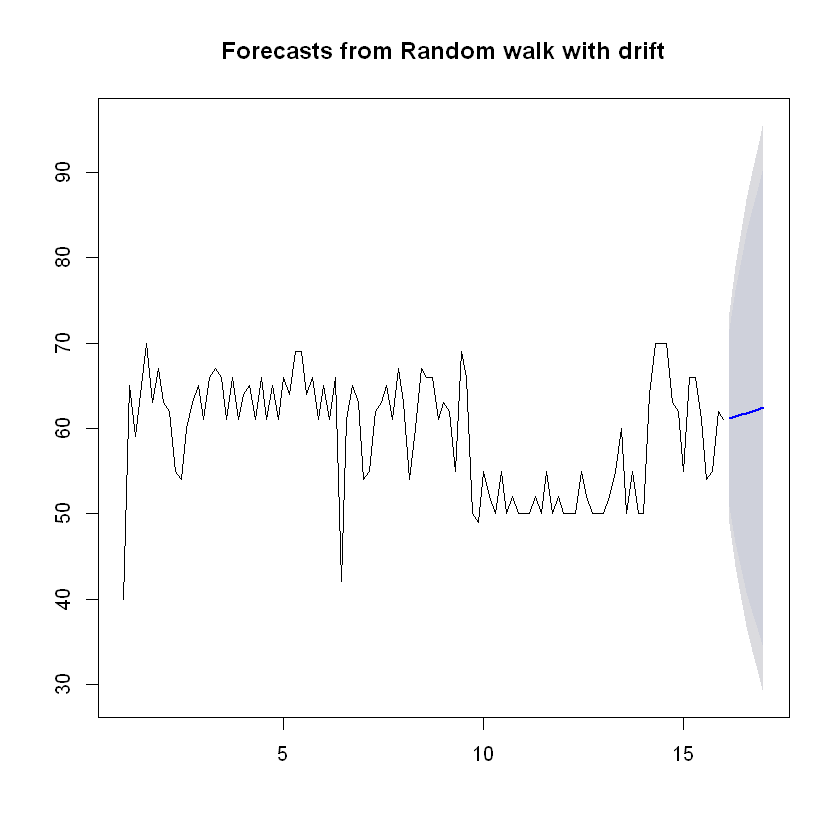

In [19]:
## Forecasts from mean
mf_idly <- meanf(idlyts, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_idly)

## forecasts from random walk with drift
rdw_idly <- rwf(idlyts, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_idly)

In [20]:
## Checking the accuracies
accuracy(mf_idly)
accuracy(rdw_idly)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-9.376671e-16,6.821903,5.97152,-1.440997,10.53079,1.13253,0.5425308


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.842256e-15,6.275273,4.510476,-0.5583135,7.7299,0.8554351,-0.3065299


##### Prediction using Simple exponential smoothing

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       60.30295 52.78823 67.81767 48.81018 71.79572
16.29       60.30295 51.71480 68.89111 47.16850 73.43740
16.43       60.30295 50.76137 69.84453 45.71036 74.89554

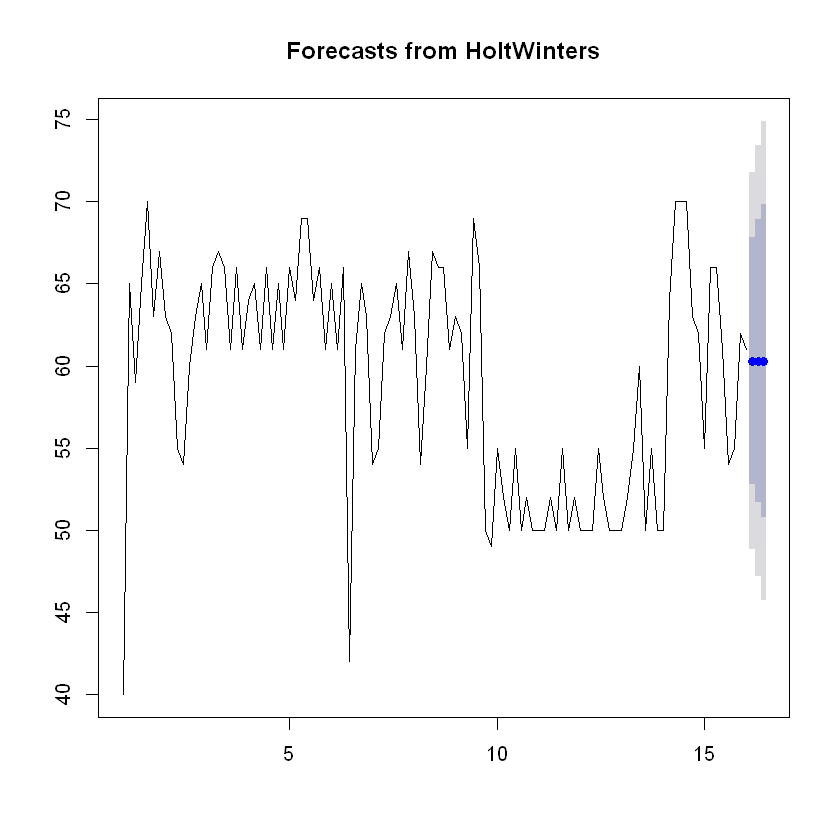

In [68]:
fit_idly <- HoltWinters(idlyts, beta=FALSE, gamma=FALSE)
fr_idly <- forecast(fit_idly, 3)
fr_idly
plot(forecast(fit_idly,3))

In [22]:
## Checking the stationarity
adf = adf.test(idlyts)
adf


	Augmented Dickey-Fuller Test

data:  idlyts
Dickey-Fuller = -2.3643, Lag order = 4, p-value = 0.4256
alternative hypothesis: stationary


Since P > 0.05, the series is not stationary. 

In [23]:
ndiffs(idlyts)

[1] 1

The series has to be differentiated by 1 to convert into stationary series. We will not be able to use ARIMA in this case. Therefore the predicted values for Idly are:
1. 60
2. 60
3. 60

##### Dosa

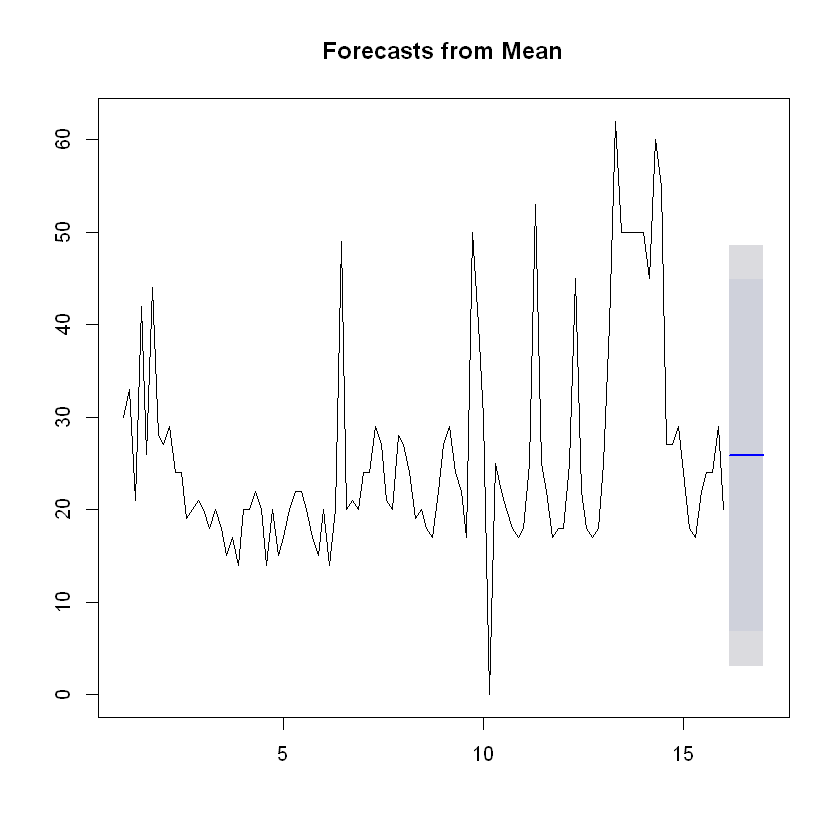

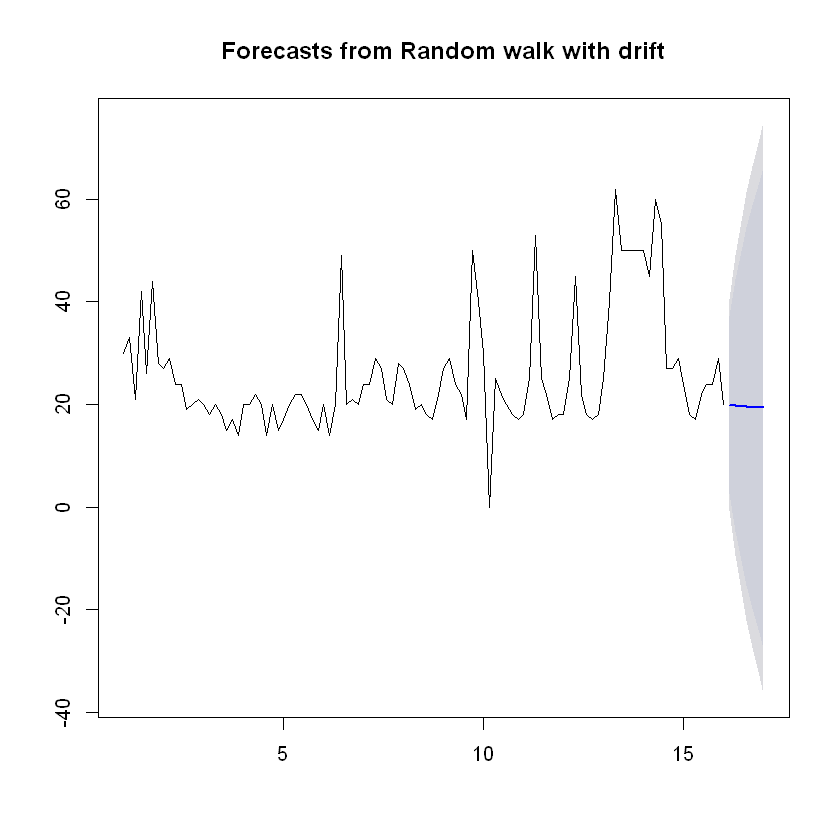

In [24]:
## Forecasts from mean
mf_dosa <- meanf(dosats, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_dosa)

## forecasts from random walk with drift
rdw_dosa <- rwf(dosats, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_dosa)

In [25]:
## Checking the accuracies
accuracy(mf_dosa)
accuracy(rdw_dosa)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.074485e-15,11.35738,8.278747,-Inf,Inf,0.8947554,0.5806544


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.384032e-16,10.42664,6.53424,-Inf,Inf,0.7062116,-0.3043693


##### Prediction using Simple exponential smoothing

      Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
16.14       23.14925 10.767907 35.53060 4.2136188 42.08488
16.29       23.14925  9.485462 36.81304 2.2522885 44.04621
16.43       23.14925  8.313464 37.98504 0.4598721 45.83863

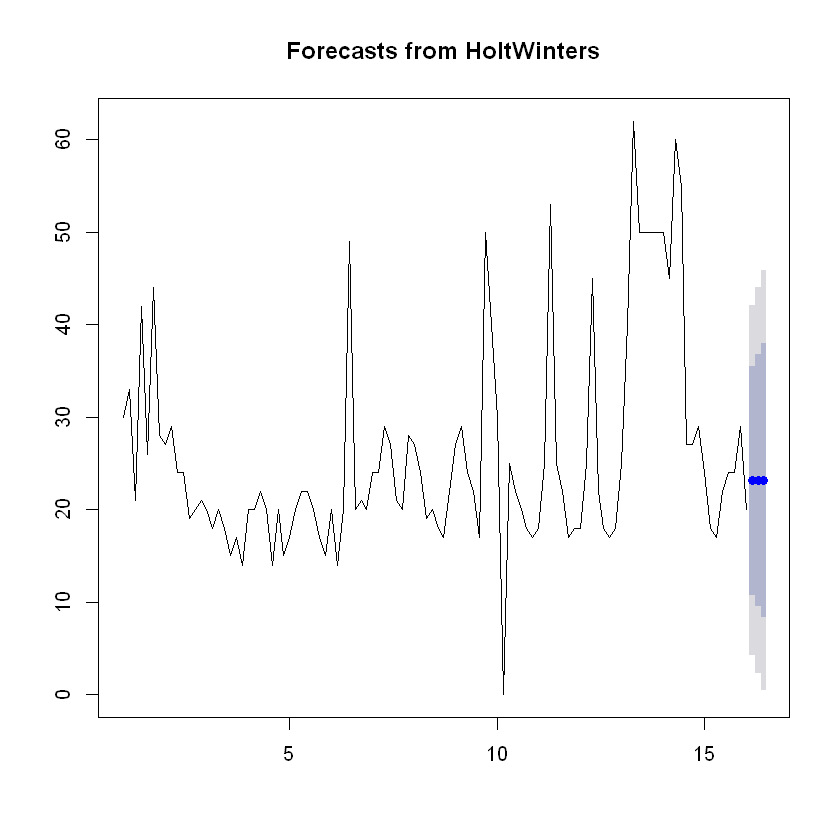

In [69]:
fit_dosa <- HoltWinters(dosats, beta=FALSE, gamma=FALSE)
fr_dosa <- forecast(fit_dosa, 3)
fr_dosa
plot(forecast(fit_dosa,3))

In [27]:
## Checking the stationarity
adf = adf.test(dosats)
adf


	Augmented Dickey-Fuller Test

data:  dosats
Dickey-Fuller = -3.0727, Lag order = 4, p-value = 0.1318
alternative hypothesis: stationary


Since P > 0.05, the series is not stationary.

In [28]:
ndiffs(dosats)

[1] 1

The series has to be differentiated by 1 to convert into stationary series. We will not be able to use ARIMA in this case. Therefore the predicted values for Dosa are:
1. 23
2. 23
3. 23

##### Chutney

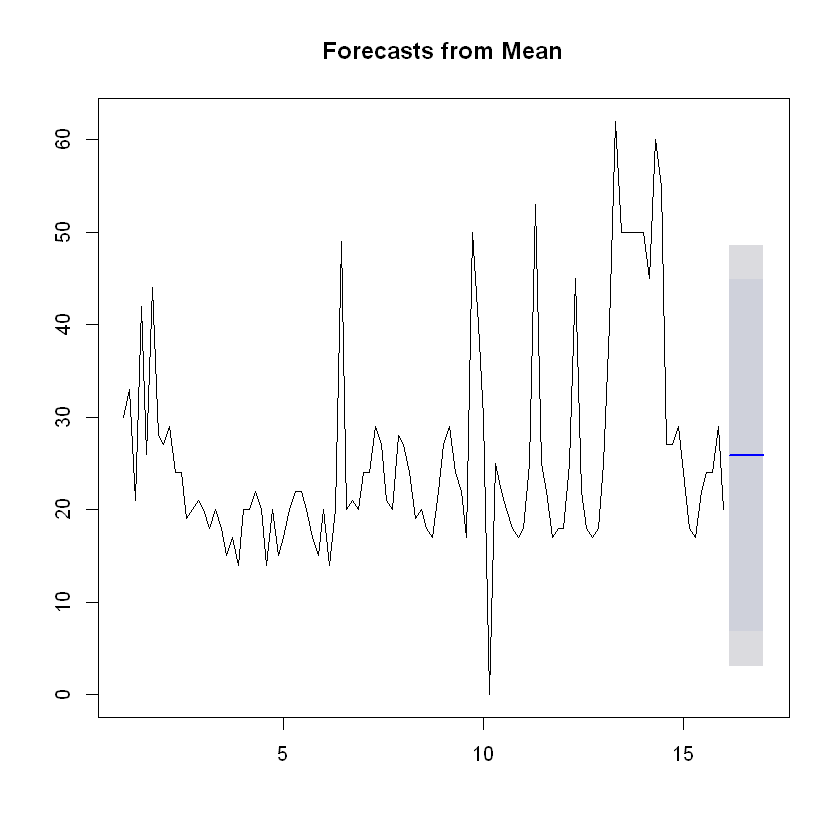

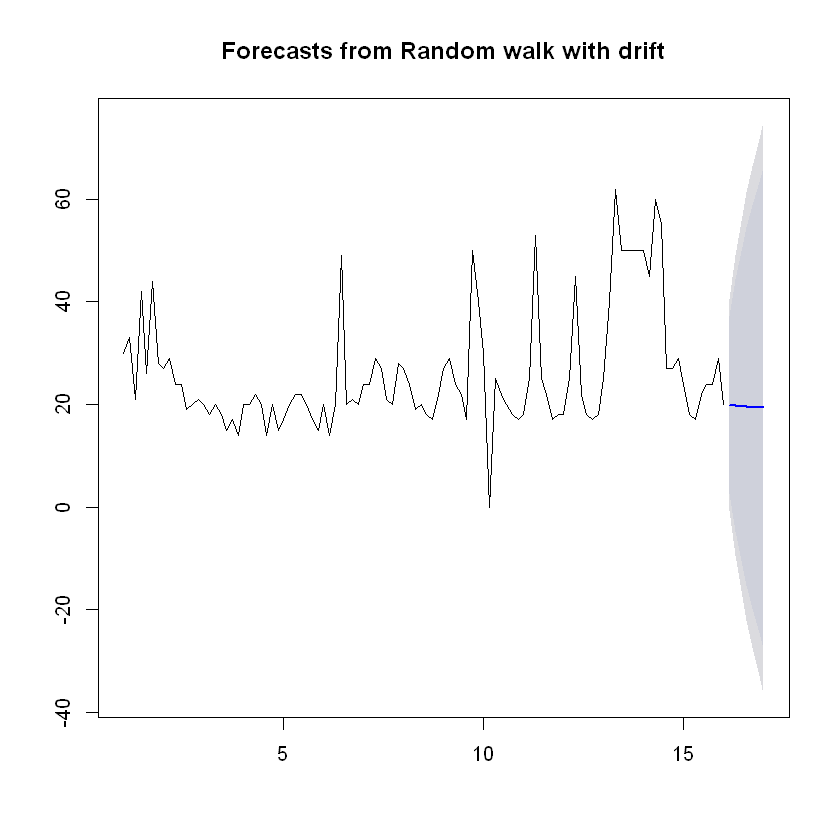

In [29]:
## Forecasts from mean
mf_chutney <- meanf(chutneyts, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_dosa)

## forecasts from random walk with drift
rdw_chutney <- rwf(chutneyts, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_dosa)

In [30]:
## Checking the accuracies
accuracy(mf_chutney)
accuracy(rdw_chutney)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-9.652828e-15,10.96948,8.242791,-0.7077387,6.319484,0.6950906,0.4185733


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.331041e-15,11.34789,8.615873,-0.3273277,6.579927,0.7265515,-0.2997814


##### Prediction using Simple exponential smoothing

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       130.4814 116.9805 143.9823 109.8336 151.1293
16.29       130.4814 115.3095 145.6533 107.2780 153.6848
16.43       130.4814 113.8052 147.1576 104.9773 155.9855

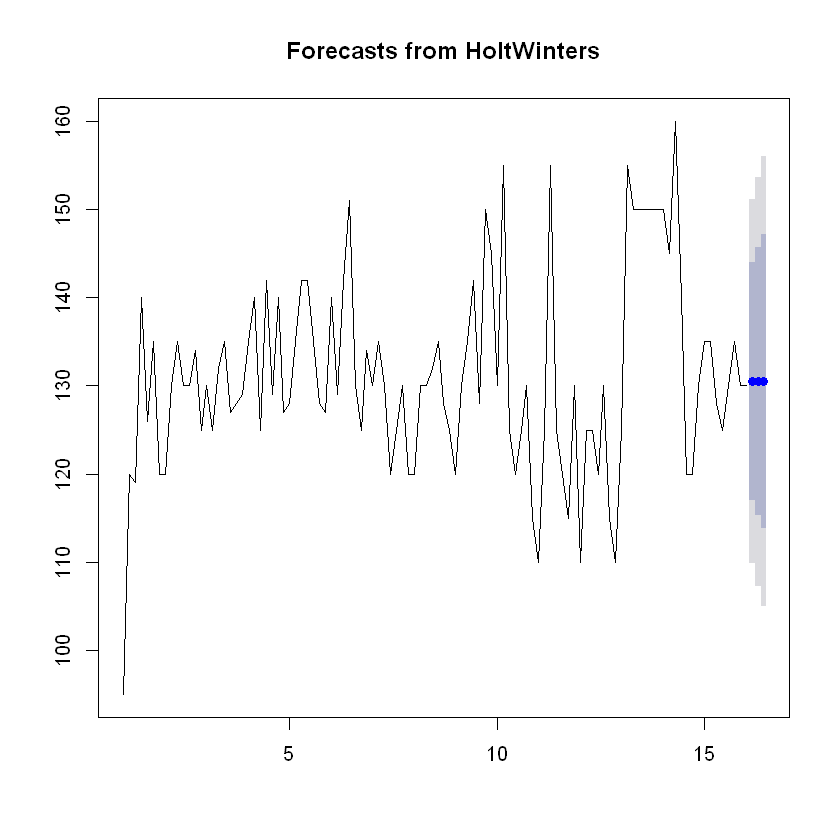

In [31]:
fit_chutney <- HoltWinters(chutneyts, beta=FALSE, gamma=FALSE)
forecast(fit_chutney, 3)
plot(forecast(fit_chutney,3))

In [32]:
## Checking the stationarity
adf = adf.test(chutneyts)
adf


	Augmented Dickey-Fuller Test

data:  chutneyts
Dickey-Fuller = -3.4474, Lag order = 4, p-value = 0.05032
alternative hypothesis: stationary


In [33]:
ndiffs(chutneyts)

[1] 0

Since P is almost equal to 0.05 and ndiffs = 0, we can apply arima to get better predictions.

##### Prediction using ARIMA

In [34]:
auto.arima(chutneyts)

Series: chutneyts 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.4616  130.7316
s.e.  0.0912    1.7644

sigma^2 estimated as 98.7:  log likelihood=-392.9
AIC=791.79   AICc=792.03   BIC=799.78

In [70]:
fr_chutney <- forecast(auto.arima(chutneyts),3)
fr_chutney

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       130.3939 117.6623 143.1255 110.9225 149.8652
16.29       130.5757 116.5529 144.5985 109.1297 152.0217
16.43       130.6597 116.3768 144.9426 108.8159 152.5035

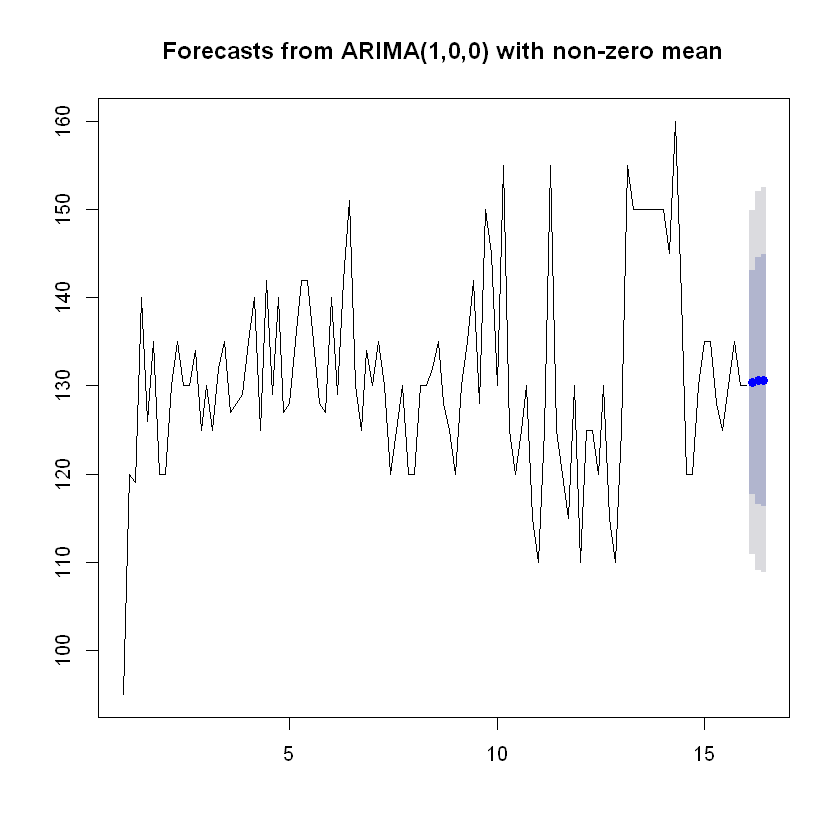

In [36]:
plot(forecast(auto.arima(chutneyts),3))

So we have a pretty accurate prediction of the next 3 values for chutney.
1. 130
2. 131
3. 131

##### Sambar

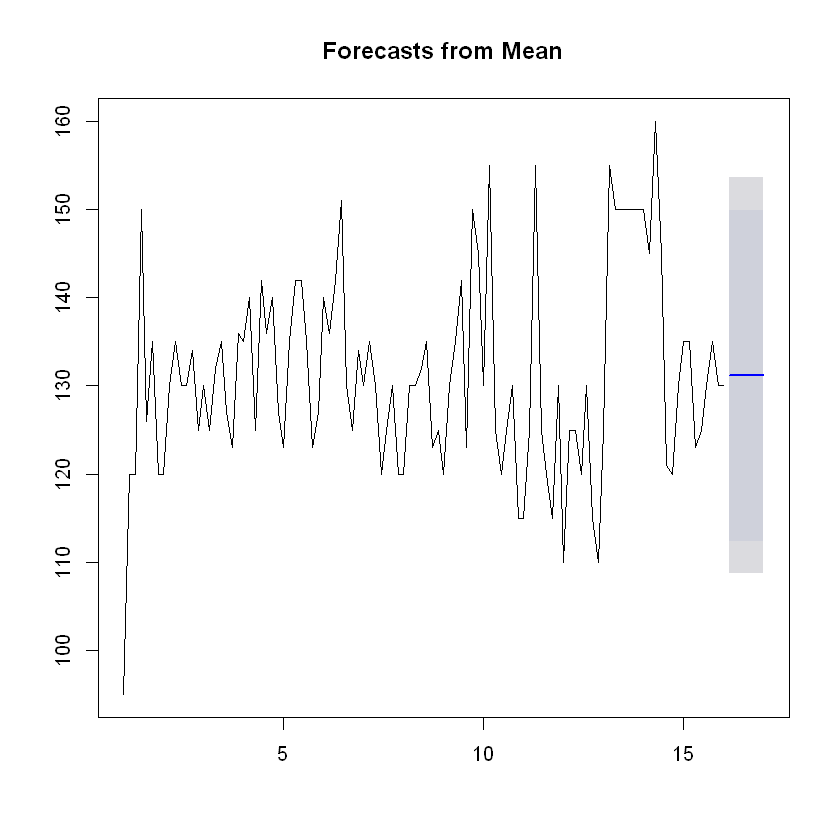

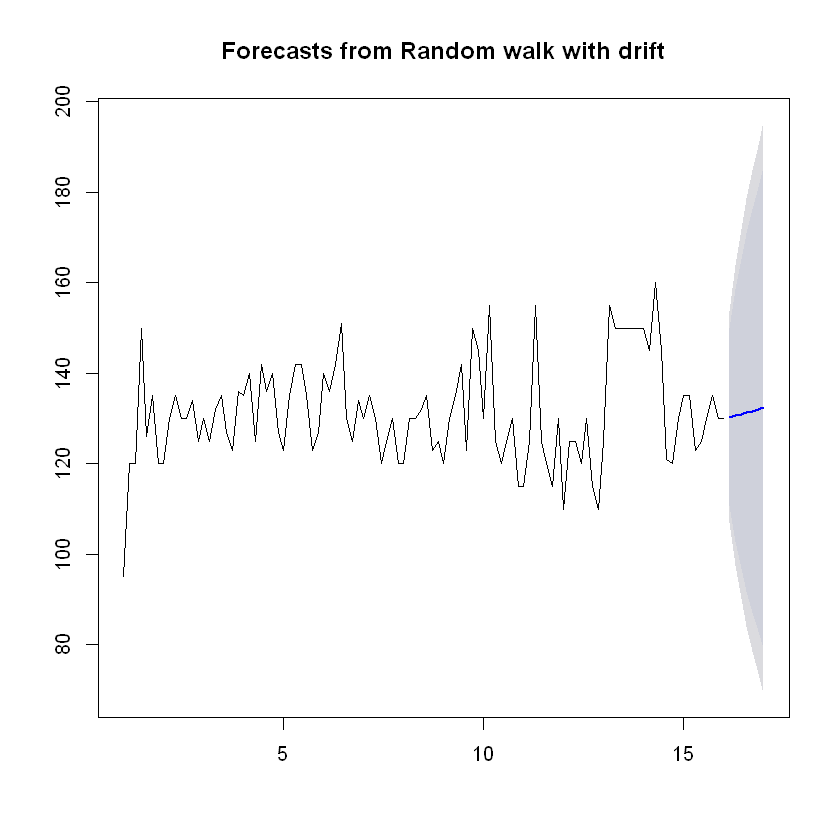

In [37]:
## Forecasts from mean
mf_sambar <- meanf(sambarts, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_sambar)

## forecasts from random walk with drift
rdw_sambar <- rwf(sambarts, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_sambar)

In [38]:
## Checking the accuracies
accuracy(mf_sambar)
accuracy(rdw_sambar)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,5.362102e-15,11.20629,8.707725,-0.7341788,6.66114,0.7008657,0.3985233


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-3.519424e-15,11.82948,8.844444,-0.3571999,6.747606,0.7118699,-0.3059513


##### Prediction using Simple exponential smoothing

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       130.4129 116.3461 144.4798 108.8996 151.9263
16.29       130.4129 114.6483 146.1776 106.3030 154.5229
16.43       130.4129 113.1163 147.7096 103.9600 156.8659

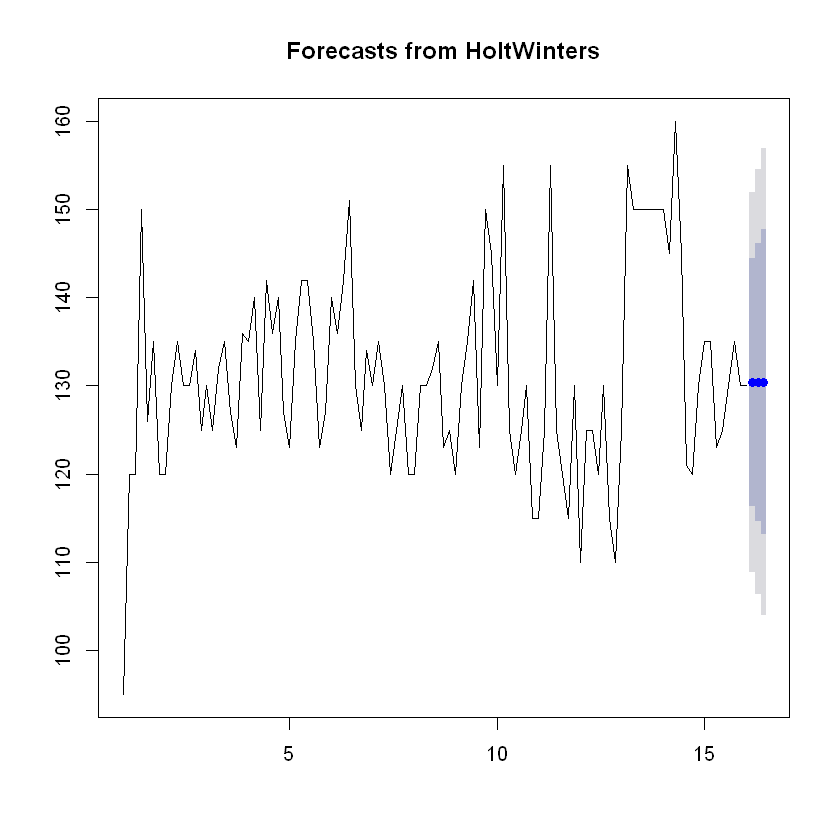

In [39]:
fit_sambar <- HoltWinters(sambarts, beta=FALSE, gamma=FALSE)
forecast(fit_sambar, 3)
plot(forecast(fit_sambar,3))

In [40]:
## Checking the stationarity
adf = adf.test(sambarts)
adf


	Augmented Dickey-Fuller Test

data:  sambarts
Dickey-Fuller = -3.3931, Lag order = 4, p-value = 0.05937
alternative hypothesis: stationary


In [41]:
ndiffs(sambarts)

[1] 0

Since P is almost equal to 0.05 and ndiffs = 0, we can apply arima to get better predictions.

###### Prediction using ARIMA

In [42]:
auto.arima(sambarts)

Series: sambarts 
ARIMA(1,0,0)(1,0,0)[7] with non-zero mean 

Coefficients:
         ar1     sar1      mean
      0.4441  -0.0672  130.9226
s.e.  0.0926   0.1045    1.6598

sigma^2 estimated as 106:  log likelihood=-396.17
AIC=800.35   AICc=800.74   BIC=811

In [71]:
fr_sambar <- forecast(auto.arima(sambarts),3)
fr_sambar

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       130.3605 117.1660 143.5550 110.1813 150.5397
16.29       131.3275 116.8907 145.7644 109.2482 153.4068
16.43       131.2641 116.5947 145.9336 108.8291 153.6991

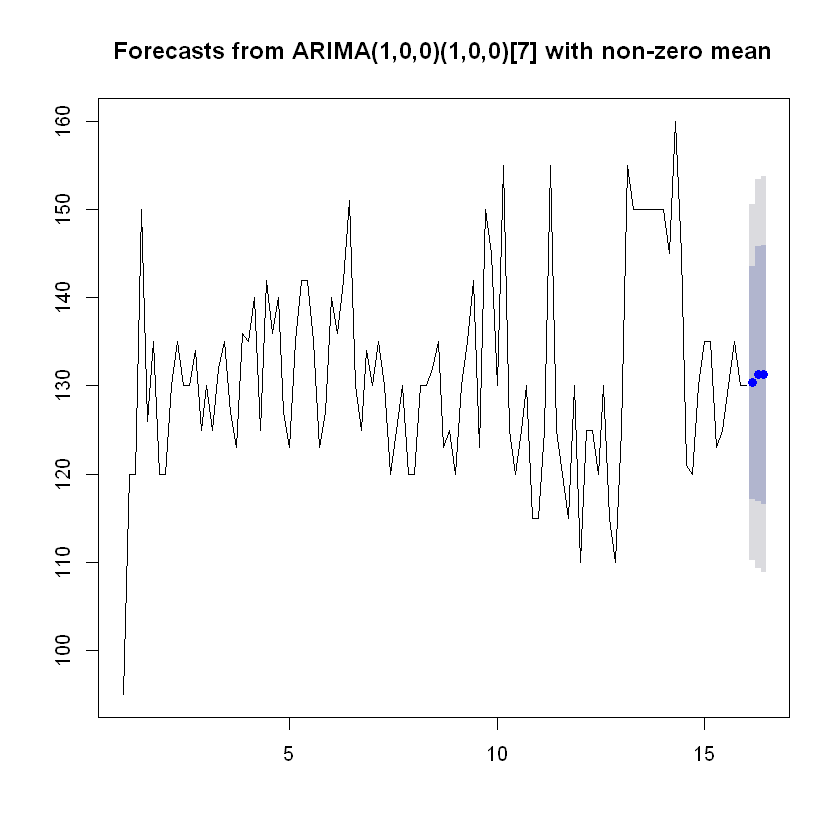

In [44]:
plot(forecast(auto.arima(sambarts),3))

So we have a pretty accurate prediction of the next 3 values for sambar.
1. 130
2. 131
3. 131

##### Continental Breakfast

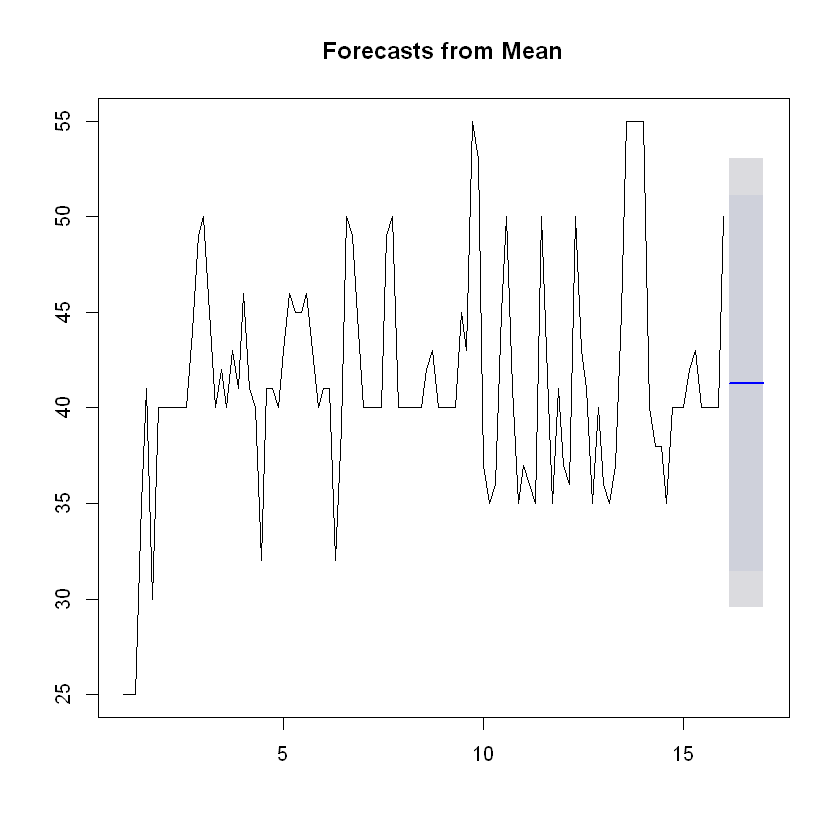

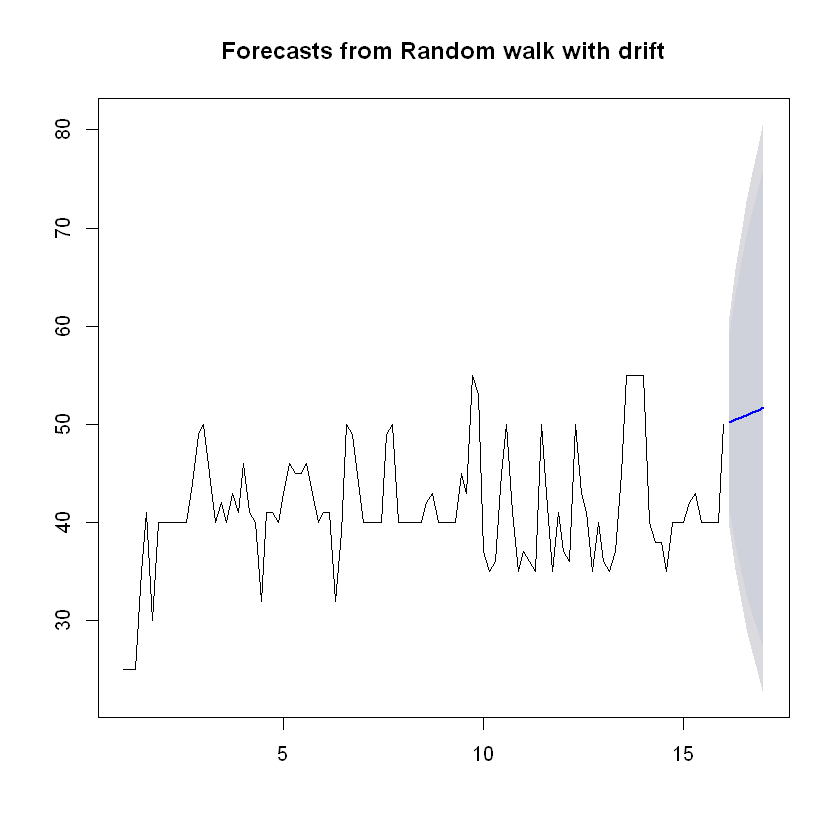

In [45]:
## Forecasts from mean
mf_contbf <- meanf(contbfts, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_contbf)

## forecasts from random walk with drift
rdw_contbf <- rwf(contbfts, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_contbf)

In [46]:
## Checking the accuracies
accuracy(mf_contbf)
accuracy(rdw_contbf)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.682193e-16,5.872814,4.186543,-2.190285,10.5877,0.7590985,0.5259398


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.571422e-15,5.450249,3.756009,-0.7976273,9.114935,0.6810346,-0.0848426


##### Prediction using Simple exponential smoothing

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       48.10052 41.13809 55.06295 37.45240 58.74864
16.29       48.10052 39.14067 57.06037 34.39761 61.80343
16.43       48.10052 37.51362 58.68742 31.90926 64.29178

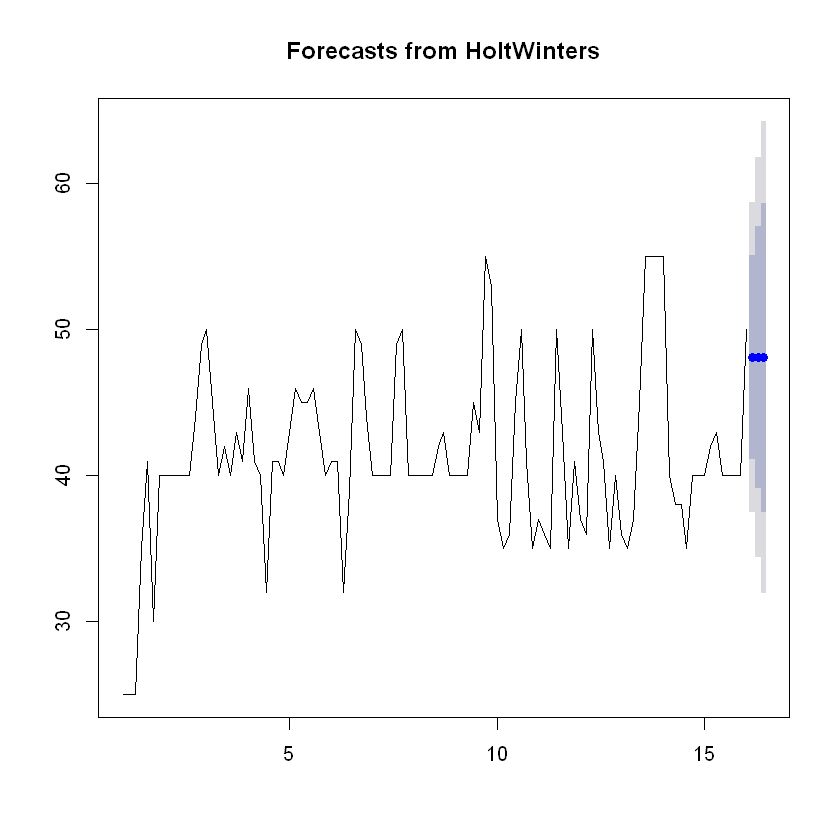

In [47]:
fit_contbf <- HoltWinters(contbfts, beta=FALSE, gamma=FALSE)
forecast(fit_contbf, 3)
plot(forecast(fit_contbf,3))

In [48]:
## Checking the stationarity
adf = adf.test(contbfts)
adf

Warning message in adf.test(contbfts):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  contbfts
Dickey-Fuller = -4.7305, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


In [49]:
ndiffs(contbfts)

[1] 0

Since P < 0.05 and also ndiffs = 0, we can apply ARIMA to forecast the values

##### Prediction using ARIMA


In [50]:
auto.arima(contbfts)

Series: contbfts 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     mean
      0.6715  -0.1911  41.2874
s.e.  0.0977   0.1014   0.8961

sigma^2 estimated as 23.85:  log likelihood=-317.22
AIC=642.45   AICc=642.85   BIC=653.1

In [72]:
fr_contbf <- forecast(auto.arima(contbfts),3)
fr_contbf

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       47.38354 41.12456 53.64252 37.81126 56.95582
16.29       43.71547 36.17646 51.25448 32.18555 55.24539
16.43       41.75261 34.04033 49.46489 29.95770 53.54752

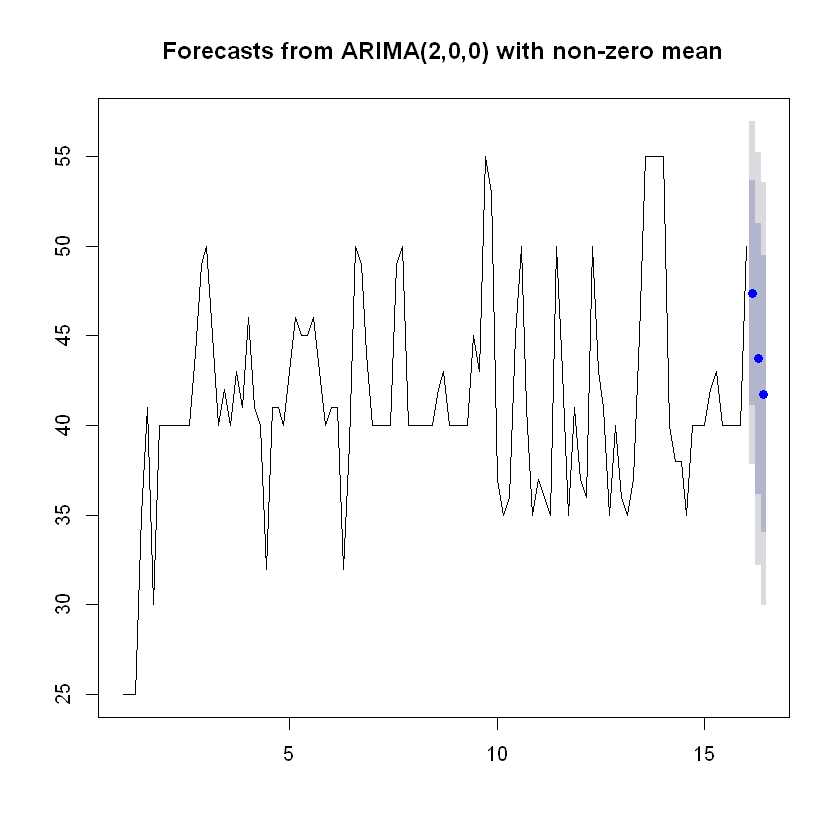

In [52]:
plot(forecast(auto.arima(contbfts),3))

So we have some pretty accurate predictions for the next 3 orders:
1. 47
2. 44
3. 42

##### North Indian Breakfast

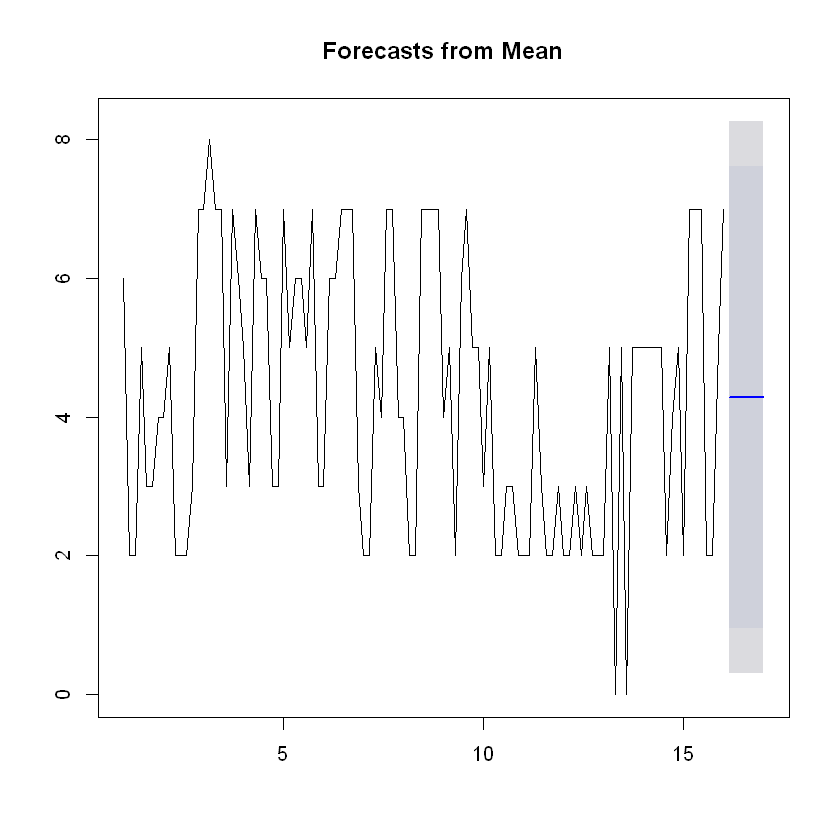

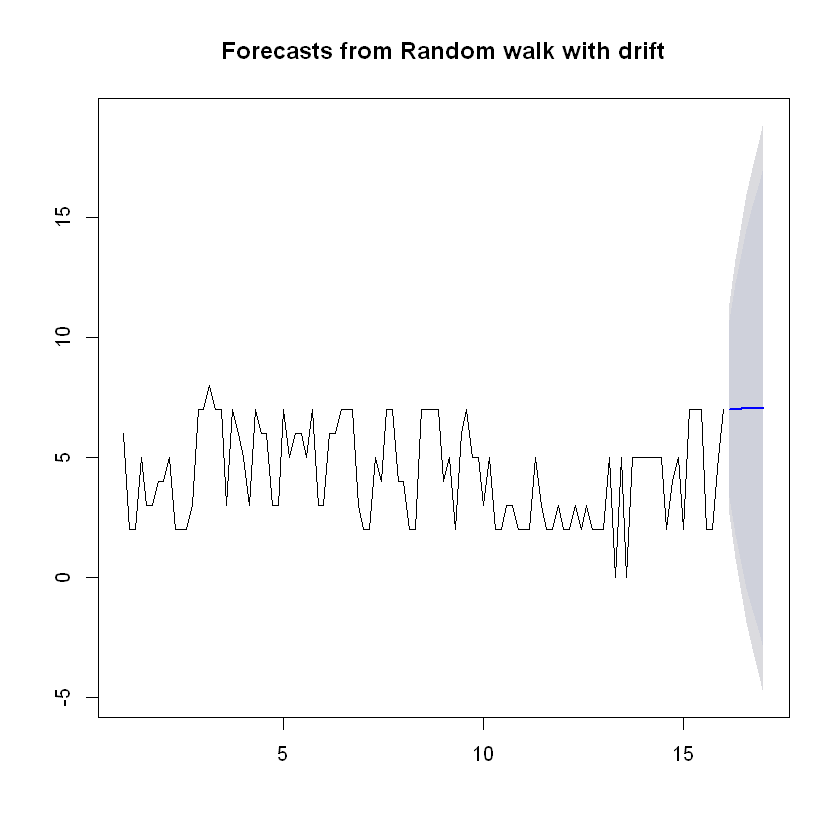

In [53]:
## Forecasts from mean
mf_northbf <- meanf(northbfts, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_northbf)

## forecasts from random walk with drift
rdw_northbf <- rwf(northbfts, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_northbf)

In [54]:
## Checking the accuracies
accuracy(mf_northbf)
accuracy(rdw_northbf)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.850797e-16,1.989381,1.773585,-Inf,Inf,1.009109,0.3643409


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,3.384363e-17,2.231784,1.555918,-Inf,Inf,0.8852639,-0.3767347


##### Prediction using Simple exponential smoothing

      Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
16.14        4.86066 2.368368 7.352952 1.0490281 8.672292
16.29        4.86066 2.312837 7.408483 0.9641012 8.757219
16.43        4.86066 2.258491 7.462829 0.8809862 8.840334

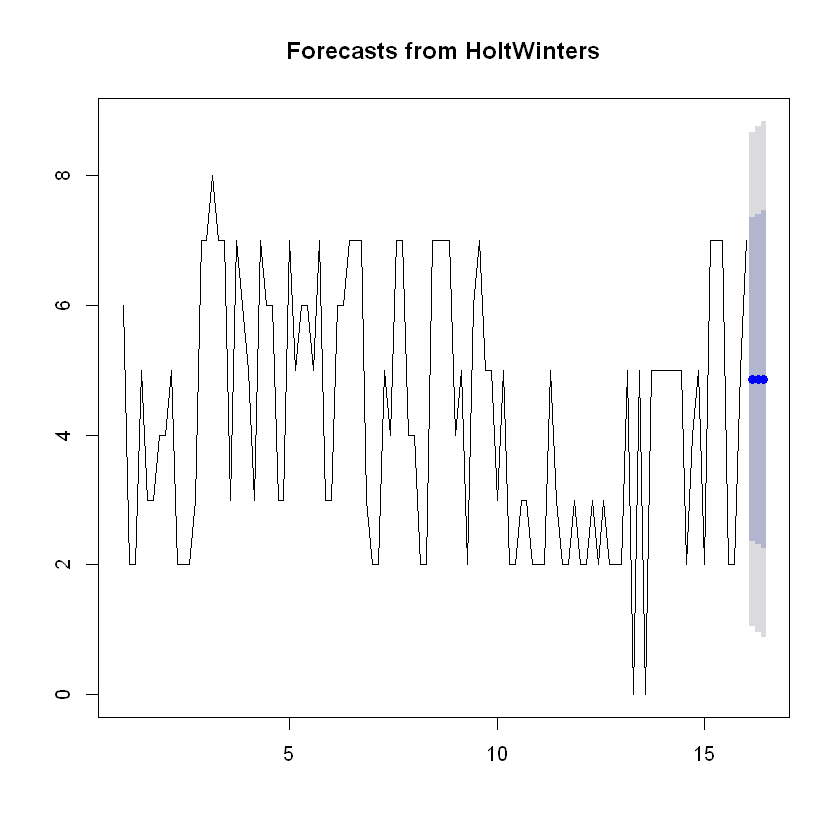

In [55]:
fit_northbf <- HoltWinters(northbfts, beta=FALSE, gamma=FALSE)
forecast(fit_northbf, 3)
plot(forecast(fit_northbf,3))

In [56]:
## Checking the stationarity
adf = adf.test(northbfts)
adf


	Augmented Dickey-Fuller Test

data:  northbfts
Dickey-Fuller = -3.4602, Lag order = 4, p-value = 0.04903
alternative hypothesis: stationary


In [57]:
ndiffs(northbfts)

[1] 1

Since P < 0.05 but ndiffs = 1, we will still try to use ARIMA model to forecast the values since the series is stationary.

##### Prediction using ARIMA

In [58]:
auto.arima(northbfts)

Series: northbfts 
ARIMA(1,1,1)(0,0,1)[7]                    

Coefficients:
         ar1      ma1    sma1
      0.2176  -0.9054  0.2078
s.e.  0.1259   0.0696  0.1080

sigma^2 estimated as 3.441:  log likelihood=-213.06
AIC=434.11   AICc=434.51   BIC=444.73

In [73]:
fr_northbf <- forecast(auto.arima(northbfts),3)
fr_northbf

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       5.759141 3.381986 8.136296 2.123596 9.394686
16.29       5.211945 2.721647 7.702243 1.403362 9.020527
16.43       5.148745 2.628654 7.668836 1.294598 9.002891

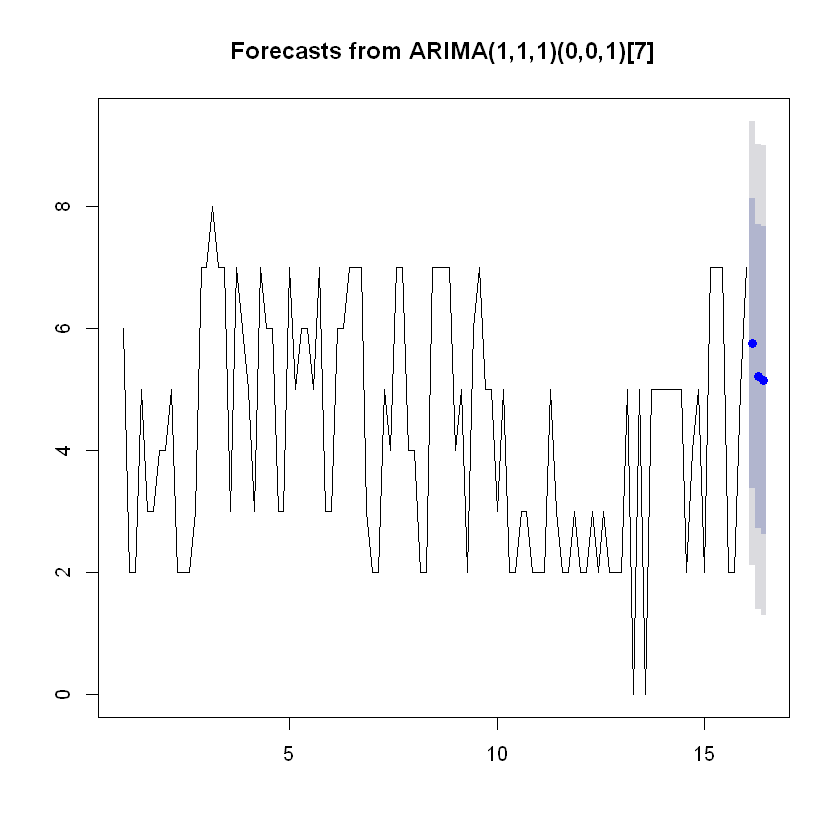

In [60]:
plot(forecast(auto.arima(northbfts),3))

So we have pretty accurate forecasts for the next 3 orders:
1. 6
2. 5
3. 5

##### Omellettes

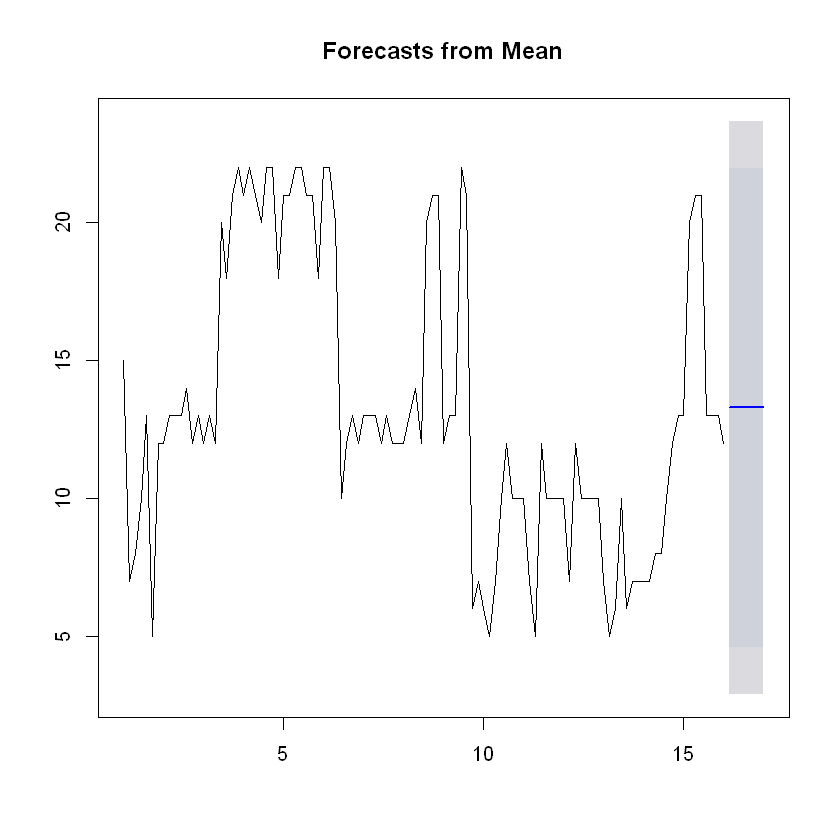

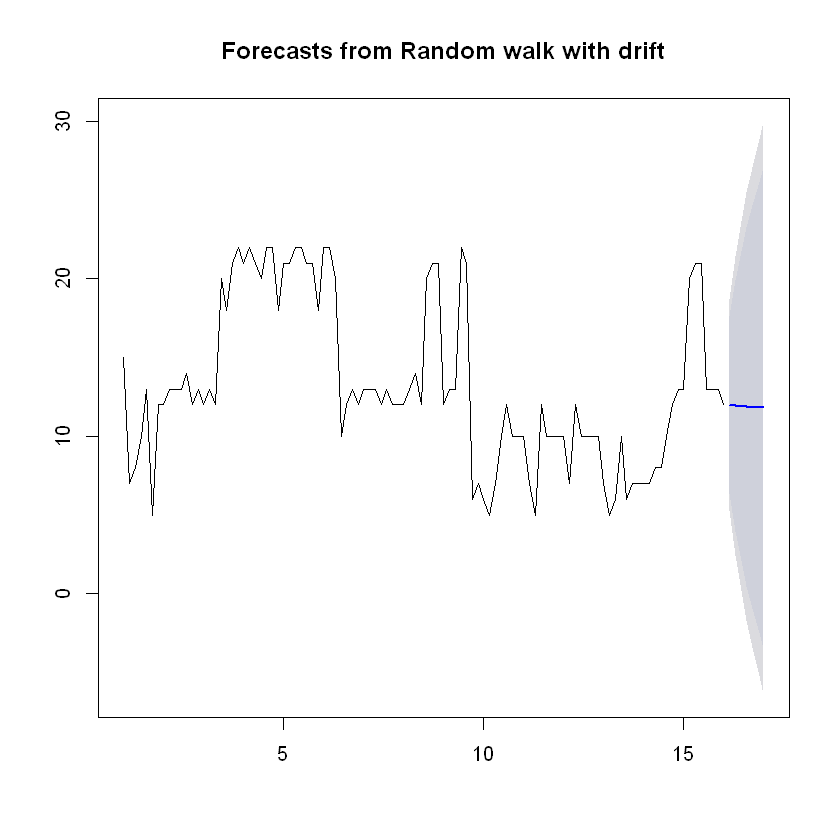

In [61]:
## Forecasts from mean
mf_omellette <- meanf(omellettets, h=7, level = c(90,95), fan = FALSE, lambda = NULL)
plot(mf_omellette)

## forecasts from random walk with drift
rdw_omellette <- rwf(omellettets, h = 7, drift = T, level = c(90,95), fan = FALSE, lambda = NULL)
plot(rdw_omellette)

In [62]:
## Checking the accuracies
accuracy(mf_omellette)
accuracy(rdw_omellette)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-6.034628e-16,5.197522,4.187611,-18.27509,38.3846,1.049553,0.7873948


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.015309e-16,3.398759,2.057687,-4.901748,19.66875,0.5157241,-0.1738205


##### Prediction using Simple exponential smoothing

      Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
16.14       12.33224 8.058827 16.60565 5.796620 18.86785
16.29       12.33224 7.073102 17.59137 4.289084 20.37539
16.43       12.33224 6.244958 18.41952 3.022547 21.64193

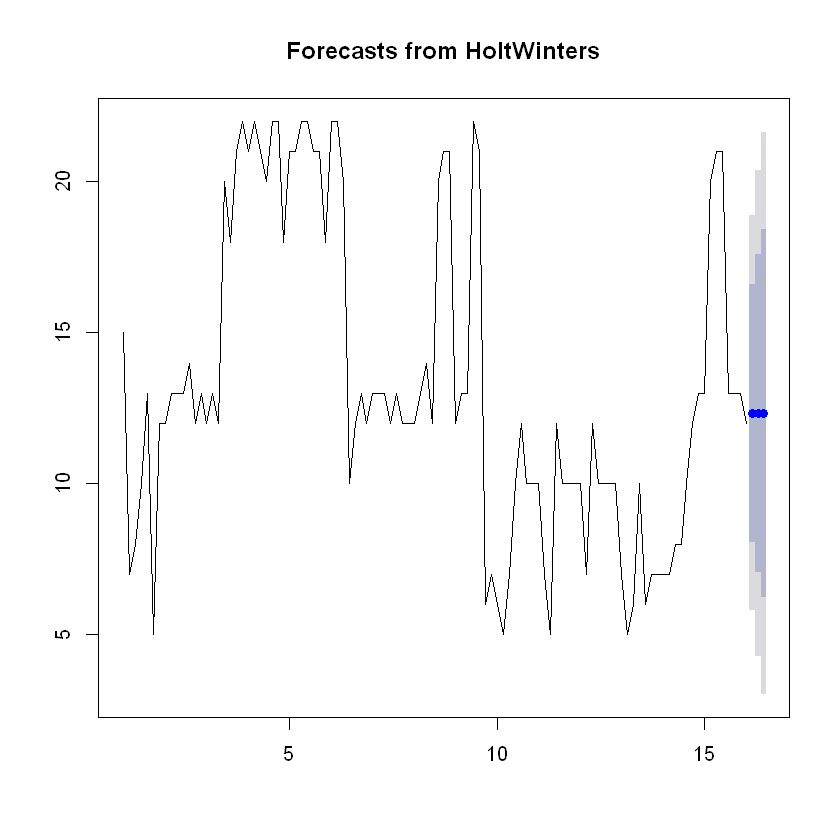

In [74]:
fit_omellette <- HoltWinters(omellettets, beta=FALSE, gamma=FALSE)
fr_omellette <- forecast(fit_omellette, 3)
fr_omellette
plot(forecast(fit_omellette,3))

In [64]:
## Checking the stationarity
adf = adf.test(omellettets)
adf


	Augmented Dickey-Fuller Test

data:  omellettets
Dickey-Fuller = -2.6089, Lag order = 4, p-value = 0.3241
alternative hypothesis: stationary


In [65]:
ndiffs(omellettets)

[1] 1

Since P > 0, the series is not stationary. Also ndiffs = 1 so the series has to be differenced by 1 to apply ARIMA model. Therefore we take the forecasted values of next 3 orders from SES model.
1. 12
2. 12
3. 12

##### Forecasts for the next 3 day orders

In [87]:
df_final <- data.frame(t=c(1:3),fr_boccp$mean, fr_idly$mean, fr_dosa$mean, fr_chutney$mean, fr_sambar$mean, fr_contbf$mean, fr_northbf$mean, fr_omellette$mean)
df_final

t,fr_boccp.mean,fr_idly.mean,fr_dosa.mean,fr_chutney.mean,fr_sambar.mean,fr_contbf.mean,fr_northbf.mean,fr_omellette.mean
1,252.0525,60.30295,23.14925,130.3939,130.3605,47.38354,5.759141,12.33224
2,246.3525,60.30295,23.14925,130.5757,131.3275,43.71547,5.211945,12.33224
3,236.9573,60.30295,23.14925,130.6597,131.2641,41.75261,5.148745,12.33224
